## Data Preprocessing


In [1]:
import pandas as pd
import numpy as np
import folium
import requests
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

In [2]:
dataset = pd.read_csv(r"C:\Users\user\Desktop\amsterdam\listings.csv")

In [3]:
Latitude = 52.379189
longitude = 4.899431

In [4]:
missing_values = dataset.isnull().sum()

In [5]:
print(missing_values.sort_values()[::-1])

bathrooms                       8386
calendar_updated                8386
neighbourhood_group_cleansed    8386
host_neighbourhood              5342
host_about                      3739
                                ... 
property_type                      0
longitude                          0
latitude                           0
number_of_reviews_l30d             0
id                                 0
Length: 75, dtype: int64


In [6]:
print("Original DataFrame:")
print(dataset)

dataset_filled = dataset.fillna(0)
print("\nDataFrame after replacing NaN with 0:")
print(dataset_filled)

Original DataFrame:
                      id                                      listing_url  \
0                 761411              https://www.airbnb.com/rooms/761411   
1                 768274              https://www.airbnb.com/rooms/768274   
2                 768737              https://www.airbnb.com/rooms/768737   
3                 771217              https://www.airbnb.com/rooms/771217   
4                 771343              https://www.airbnb.com/rooms/771343   
...                  ...                                              ...   
8381  971403658453358540  https://www.airbnb.com/rooms/971403658453358540   
8382  971600466535392582  https://www.airbnb.com/rooms/971600466535392582   
8383  971686543447319533  https://www.airbnb.com/rooms/971686543447319533   
8384  971758168481363169  https://www.airbnb.com/rooms/971758168481363169   
8385  972218247170836285  https://www.airbnb.com/rooms/972218247170836285   

           scrape_id last_scraped           source  \
0

In [7]:
hayk=dataset_filled[dataset_filled['accommodates']==2].isna().sum()
hayk[hayk>0]

Series([], dtype: int64)

In [8]:
dataset_filled.head()

id                          listing_url       scrape_id last_scraped  \
0  761411  https://www.airbnb.com/rooms/761411  20230903194145   2023-09-03   
1  768274  https://www.airbnb.com/rooms/768274  20230903194145   2023-09-04   
2  768737  https://www.airbnb.com/rooms/768737  20230903194145   2023-09-03   
3  771217  https://www.airbnb.com/rooms/771217  20230903194145   2023-09-04   
4  771343  https://www.airbnb.com/rooms/771343  20230903194145   2023-09-03   

            source                                               name  \
0      city scrape  Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...   
1      city scrape  Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...   
2      city scrape  Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...   
3  previous scrape  Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...   
4      city scrape  Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...   

                                         description  \
0  Really quiet, spacious and safe, a nice place ...   
1  Our cool and spacious loft is perfect for a st...   
2  Room to rent in my houseboat. The room has a p...   
3  Spacious houseboat in Amsterdam, suitable for ...   
4  Royal Bed & Coffee Room with a very comfortabl...   

                               neighborhood_overview  \
0  The neighborhood is very green, quiet, safe an...   
1  Our neighbourhood is ons of the most beautiful...   
2  It is just outside the Jordan in between the c...   
3  The houseboat lies in an area with ± 200 house...   
4  The building is located in Amsterdam centre in...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/10591508/bf30...  4013546  ...   
1  https://a0.muscache.com/pictures/27206847/31f5...  3678216  ...   
2  https://a0.muscache.com/pictures/1df40445-354f...  3877342  ...   
3  https://a0.muscache.com/pictures/57715927/0808...  4068486  ...   
4  https://a0.muscache.com/pictures/ea22d262-7456...  2313061  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.92                   4.42                4.65   
1                        4.94                   4.86                4.77   
2                        4.87                   4.72                4.68   
3                        5.00                   4.67                4.56   
4                        4.91                   4.96                4.79   

                    license instant_bookable calculated_host_listings_count  \
0  0363 D4AD DCF3 E72A 56A2                t                              2   
1  0363 7A50 18E7 51D1 B7F9                t                              1   
2      036396BE30827DDB9575                t                              3   
3  0363 D807 AD6C 499A F871                f                              1   
4  0363 8C61 E9B9 5582 913E                f                              2   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            2   
1                                            0   
2                                            2   
3                                            0   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              2.30  
1                                           0              0.64  
2                                           0              2.73  
3                                           0              0.11  
4                                           0              6.62  

[5 rows x 75 columns]

Checking how many rows and columns the dataset has and check how many unique values are present for each column.


In [9]:
print('\nRows : ',dataset_filled.shape[0])
print('\nColumns :', dataset_filled.shape[1])
print('\nColumns:',dataset_filled.columns.to_list())
print(' \nUnique:\n',dataset_filled.nunique())


Rows :  8386

Columns : 75

Columns: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availabil

So, we have the 8386 Rows, 75 Columns.


### Plotting the dataset in a map

In [10]:
Lat = 52.379189
Long = 4.899431
locations = list(zip(dataset_filled.latitude, dataset_filled.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

### finding missing values


In [11]:
missing_values = dataset_filled.isnull().sum()
print(missing_values)

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64


In [12]:
import geopandas as gpd
df = pd.read_json('neighbourhoods.geojson')

In [13]:
hayk=dataset_filled[dataset_filled['accommodates']==2].isna().sum()
hayk[hayk>0]

Series([], dtype: int64)

In [14]:
print(f'It has the shape of listing: {dataset.shape}')

It has the shape of listing: (8386, 75)


In [15]:
dataset_filled.fillna({'reviews_per_month':0},inplace=True)

### Scatter Plot to show the neighbourhood data based on Latitude and Longitude

In [16]:
import seaborn as sns

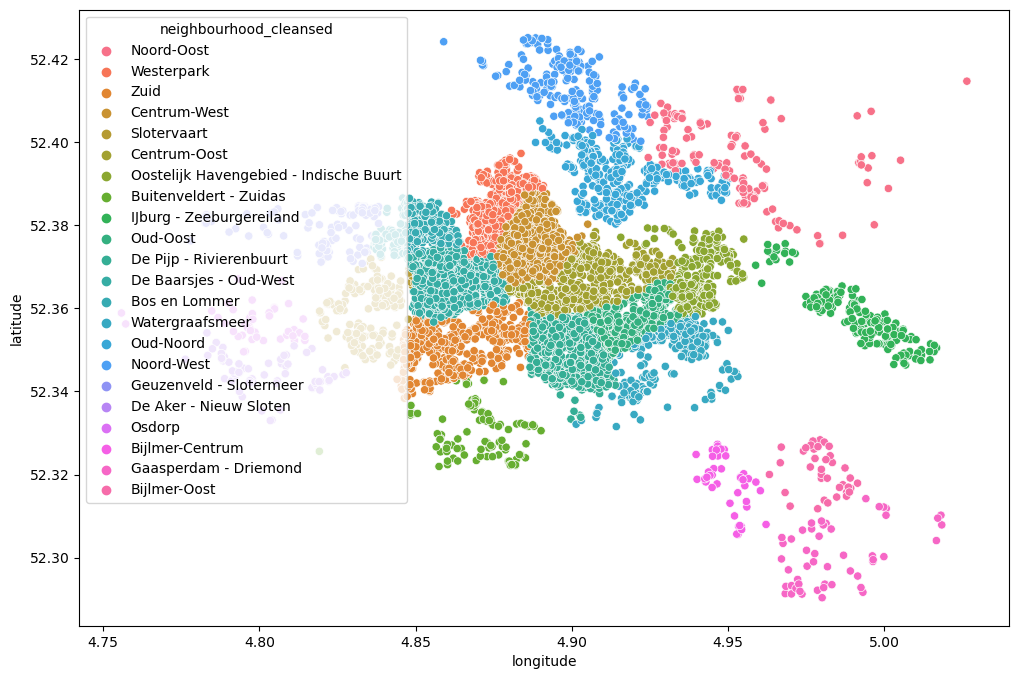

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dataset_filled.longitude,y=dataset_filled.latitude,hue=dataset_filled.neighbourhood_cleansed)
plt.show()

In [18]:
lats2023 = dataset_filled['latitude'].tolist()
lons2023 = dataset_filled['longitude'].tolist()
locations = list(zip(lats2023, lons2023))

map1 = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

We can see, that most listings are in the city centre.

### Unique values for room type and neighbourhood.

It is very important to analyze the Unique values, this gives a lot of insight to the data and the user preference for a particular choice. We will take Room Type and Location.
From the below, we have 4 types of room in the dataset and more than 20 different neighbourhood.

In [19]:
print('Unique value for room_type are :',dataset_filled.room_type.unique())
print ('Unique value for neighbourhood_group are :',dataset_filled.neighbourhood_cleansed.unique())

Unique value for room_type are : ['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']
Unique value for neighbourhood_group are : ['Noord-Oost' 'Westerpark' 'Zuid' 'Centrum-West' 'Slotervaart'
 'Centrum-Oost' 'Oostelijk Havengebied - Indische Buurt'
 'Buitenveldert - Zuidas' 'IJburg - Zeeburgereiland' 'Oud-Oost'
 'De Pijp - Rivierenbuurt' 'De Baarsjes - Oud-West' 'Bos en Lommer'
 'Watergraafsmeer' 'Oud-Noord' 'Noord-West' 'Geuzenveld - Slotermeer'
 'De Aker - Nieuw Sloten' 'Osdorp' 'Bijlmer-Centrum'
 'Gaasperdam - Driemond' 'Bijlmer-Oost']


### The distribution of the room type 

We will first check the distribution of the room type by grouping the data. The room type is very important in Amsterdam. Starting from early 2017, Airbnb’s systems are automatically limiting entire home listings in Amsterdam to 60 nights per calendar year. And we can see that this restriction applies to most of the listings.So, from the below its clear the Apartment and Private data is more than that of hotel rooms and shared rooms.

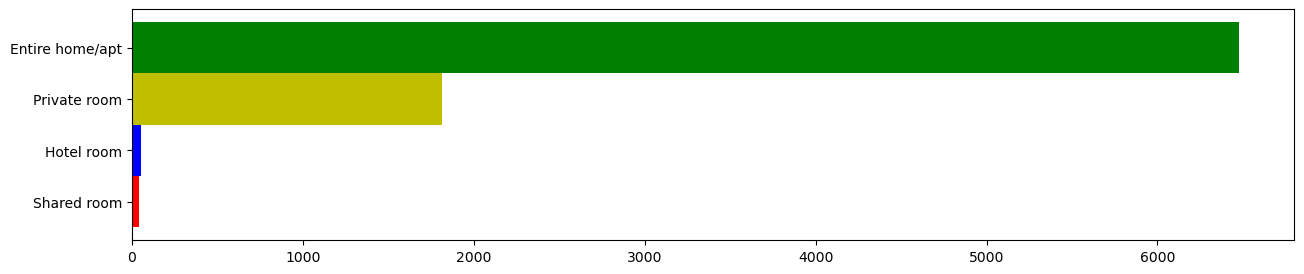

In [20]:
freq = dataset_filled['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["r", "b", "y","g"])
plt.show()

In the dataset, we find a lot of different property types.

In [21]:
dataset_filled.property_type.unique()

array(['Private room in condo', 'Entire rental unit',
       'Private room in boat', 'Houseboat', 'Private room in rental unit',
       'Private room in bed and breakfast', 'Private room in townhouse',
       'Private room in houseboat', 'Entire guest suite', 'Entire condo',
       'Entire loft', 'Private room in home', 'Entire guesthouse',
       'Entire townhouse', 'Entire home', 'Room in boutique hotel',
       'Private room in loft', 'Private room in guest suite', 'Boat',
       'Private room in farm stay', 'Room in bed and breakfast',
       'Private room in guesthouse', 'Private room',
       'Shared room in home', 'Entire serviced apartment',
       'Private room in villa', 'Private room in tiny home',
       'Private room in casa particular', 'Barn',
       'Private room in bungalow', 'Shared room in condo', 'Entire cabin',
       'Room in hotel', 'Entire villa', 'Entire place',
       'Private room in serviced apartment', 'Room in aparthotel',
       'Tiny home', 'Private room

Many of those property types have very few listings in Amsterdam. In the figure below, We display property types with at least 100 listings. So, the majority of the properties in Amsterdam are Entire home/ apartments (Entire rental unit, Entire condo, Entire home).

In [22]:
prop = dataset_filled.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis=1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total'] >= 100]
prop = prop.drop(columns=['total'])


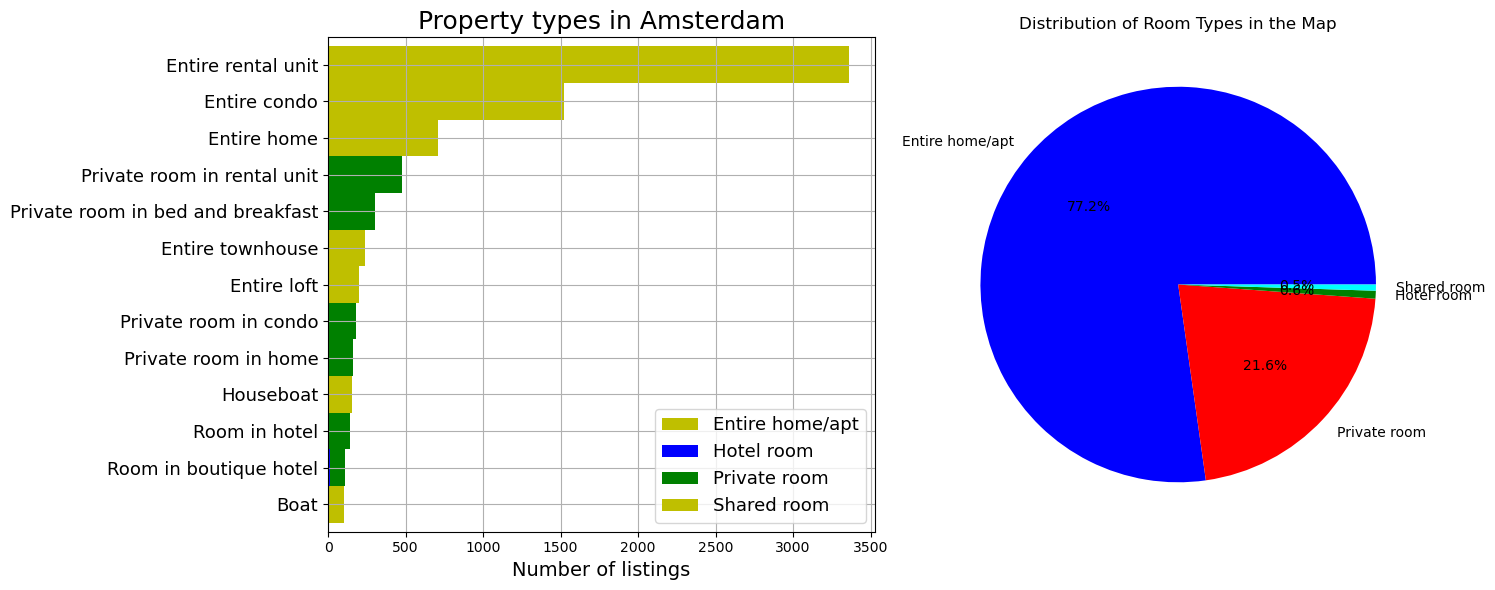

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
prop.plot(kind='barh', stacked=True, color=["y", "b", "g"],
          linewidth=1, grid=True, ax=ax1, width=1)
ax1.set_title('Property types in Amsterdam', fontsize=18)
ax1.set_xlabel('Number of listings', fontsize=14)
ax1.set_ylabel("")
ax1.legend(loc=4, prop={"size": 13})
ax1.tick_params(axis='y', labelsize=13)

numbers = dataset_filled['room_type'].value_counts()[:12]
ax2.pie(numbers.values, labels=numbers.index, autopct='%1.1f%%', colors=['b', 'r', 'g', 'cyan', 'gray'])
ax2.set_title('Distribution of Room Types in the Map')

plt.tight_layout()

plt.show()

### Number of people

As we can see, most listings are for 2 people and then for 4 people. In addition, Airbnb uses a maximum of 16 guests per listing.

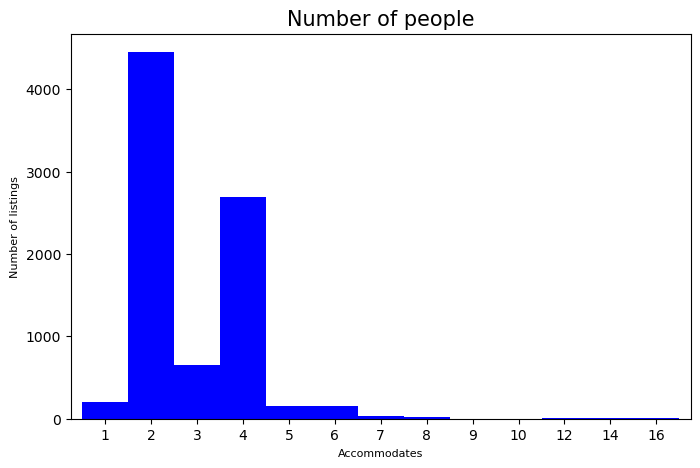

In [24]:
feq=dataset_filled['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(8, 5), color='b', width=1, rot=0)
plt.title("Number of people", fontsize=15)
plt.ylabel('Number of listings', fontsize=8)
plt.xlabel('Accommodates', fontsize=8)
plt.show()

### Top 10 Apartment

We will do it to check for the top hoteliers if it is the same location or it is spread out.

In [25]:
hayk=dataset_filled[dataset_filled['accommodates']==2].isna().sum()
hayk[hayk>0]

Series([], dtype: int64)

In [26]:
apt = dataset_filled[dataset_filled['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_id','host_name', 'neighbourhood_cleansed']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

host_id        host_name   neighbourhood_cleansed  apartment
5648  364305280           Arnold  De Pijp - Rivierenbuurt         14
5387  241644101       Wittenberg             Centrum-Oost         14
5664  375961673          Cityden            Bos en Lommer          9
1477    9282300    Dutch Masters             Centrum-Oost          9
6032  497874880            James             Centrum-West          8
5702  395728982           Arnoud  Geuzenveld - Slotermeer          7
4899  135487531  Rogier & Nicole               Noord-West          7
6021  495838645            Mario             Centrum-West          6
3654   46691672       Eva & Kobe                Oud-Noord          6
3065   30890942   Zoku Amsterdam             Centrum-Oost          6

### Top 10 Private room

In [27]:
private_room = dataset_filled[dataset_filled['room_type']=='Private room']
list_private = private_room.groupby(['host_id','host_name','neighbourhood_cleansed']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)

host_id                   host_name  neighbourhood_cleansed  private
395    14574533             Hotel Not Hotel  De Baarsjes - Oud-West       21
1256  488984558                    Abdullah            Centrum-West       14
179     4456680                 Neal Estate  De Aker - Nieuw Sloten       12
854   121291199                       Robin         Watergraafsmeer       11
1056  243878598                        Bunk               Oud-Noord       10
1202  419001535                        Dima                    Zuid       10
1045  237371423  Conscious Hotel Westerpark              Westerpark        9
1106  311321908               Melrose Hotel            Centrum-West        9
1251  484535538                   RoomPicks  Buitenveldert - Zuidas        9
115     3040748                        Henk              Noord-Oost        8

### Data distirbution for neighbourhood (location)


In [28]:
hayk=dataset_filled[dataset_filled['accommodates']==2].isna().sum()
hayk[hayk>0]

Series([], dtype: int64)

(The figure in the left ) we plot the latitude and longitude in a scatter plot to have the cluster of the location, the same we did with the folium maps. From the below figure in the right side, it looks like De Baatsjes-Oud-West, Centrum-West and De Pijp have more number of listing. And from the table below, we can see, that the 'Hotel Not Hotel' the most popular host in De Baarsjes-Oud-West, which is located only 250 metres from Kinkerstraat.

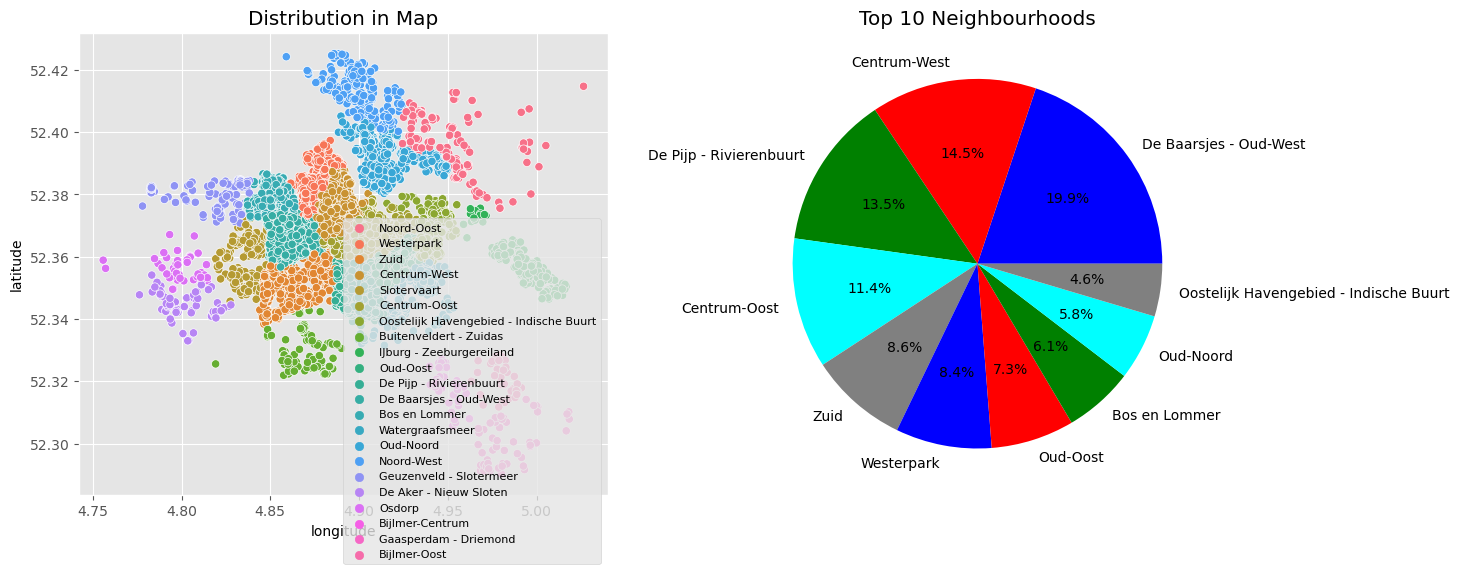

In [29]:
plt.style.use('ggplot')  
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
sns.scatterplot(x=dataset_filled['longitude'], y=dataset_filled['latitude'], hue=dataset_filled['neighbourhood_cleansed'], ax=ax1)
ax1.set_title('Distribution in Map')
ax1.legend(loc=(0.5, -0.15), prop={'size': 8})  


ax2 = fig.add_subplot(122)
numbers = dataset_filled['neighbourhood_cleansed'].value_counts()[:10]
ax2.pie(numbers.values, labels=numbers.index, autopct='%1.1f%%', colors=['b', 'r', 'g', 'cyan', 'gray'])
ax2.set_title('Top 10 Neighbourhoods')

plt.show()

In [30]:
private = dataset_filled[dataset_filled['neighbourhood_cleansed']=='De Baarsjes - Oud-West']
list_private = private.groupby(['host_id','host_name', 'neighbourhood_cleansed']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)
list_private.head(10)

host_id                   host_name  neighbourhood_cleansed  count
414    14574533             Hotel Not Hotel  De Baarsjes - Oud-West     21
1149  273266448                        Vlad  De Baarsjes - Oud-West      9
1220  428344496  Catalonia Vondel Amsterdam  De Baarsjes - Oud-West      7
1125  244695471                    Heye 130  De Baarsjes - Oud-West      5
1010  128826790             Natasja & Mylan  De Baarsjes - Oud-West      4
1032  143098191                       Peter  De Baarsjes - Oud-West      3
1147  269726966                        Adam  De Baarsjes - Oud-West      3
1093  203731852                      Sweets  De Baarsjes - Oud-West      3
799    55288093                       Petra  De Baarsjes - Oud-West      3
1231  439794676               Hedwig En Max  De Baarsjes - Oud-West      3

### Price analyzing 

We want to check Average daily price per neighbourhood.
In order to compare "apples to apples" we have only selected accommodation for 2 persons. As expected, accommodation in the city centre is the most expensive.

In [31]:
dataset_filled['price'].describe()

count        8386
unique        631
top       $200.00
freq          318
Name: price, dtype: object

In [32]:
print(dataset_filled['price'])

0        $61.00
1       $327.00
2       $109.00
3       $290.00
4       $150.00
         ...   
8381    $250.00
8382    $337.00
8383    $135.00
8384    $160.00
8385    $211.00
Name: price, Length: 8386, dtype: object


In [33]:
dataset_filled['price'] = pd.to_numeric(dataset_filled['price'].str.replace('[\$,]', '', regex=True))


In [34]:
hayk=dataset_filled[dataset_filled['accommodates']==2].isna().sum()

In [35]:
hayk[hayk>0]

Series([], dtype: int64)

In [36]:
print("Original DataFrame:")
print(dataset_filled)
dataset_filled_cleaned = dataset_filled.dropna()
print("\nDataFrame after dropping NaN values:")
print(dataset_filled_cleaned)


Original DataFrame:
                      id                                      listing_url  \
0                 761411              https://www.airbnb.com/rooms/761411   
1                 768274              https://www.airbnb.com/rooms/768274   
2                 768737              https://www.airbnb.com/rooms/768737   
3                 771217              https://www.airbnb.com/rooms/771217   
4                 771343              https://www.airbnb.com/rooms/771343   
...                  ...                                              ...   
8381  971403658453358540  https://www.airbnb.com/rooms/971403658453358540   
8382  971600466535392582  https://www.airbnb.com/rooms/971600466535392582   
8383  971686543447319533  https://www.airbnb.com/rooms/971686543447319533   
8384  971758168481363169  https://www.airbnb.com/rooms/971758168481363169   
8385  972218247170836285  https://www.airbnb.com/rooms/972218247170836285   

           scrape_id last_scraped           source  \
0

In [37]:
hayk[hayk>0]

Series([], dtype: int64)

From the figure below we can see, that the average daily price for 2 persons accommodation is the highest in Centrum-West, then in Zuid, and then in other areas.

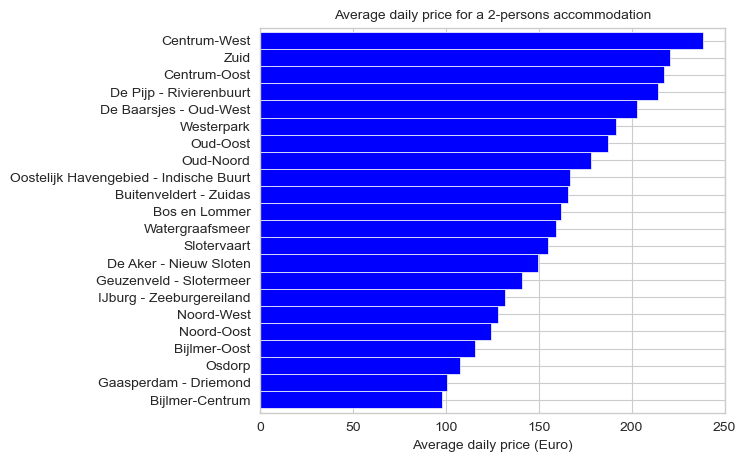

In [38]:
sns.set_style("whitegrid") 

feq = dataset_filled[dataset_filled['accommodates'] == 2]
feq = feq.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(6, 5), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=10)
plt.xlabel('Average daily price (Euro)', fontsize=10)
plt.ylabel("", fontsize=9)  
plt.show()

This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution.The boxenplot shows the distribution based on the quartiles. The distribution range shows the activity at 150 −300
  ranges. It also show the median price as a horizontal line.

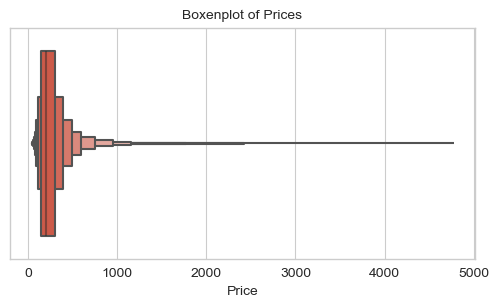

In [39]:
plt.figure(figsize=(6,3))
sns.boxenplot(x='price',data=dataset_filled, showfliers=False)
plt.title('Boxenplot of Prices', fontsize=10)
plt.xlabel('Price')
plt.show()

In the below we figure out what is the average price per night. We check for different room type and based on neighbourhood cleansed to figure out what is the average per night stay. Staying at a Apartment is always an expensive stay than shared room/private rooms for any location. We generate a bar chart showing the average price for rooms in different neighborhood groups where the minimum nights are set to 1. From the figure above, we can conclude, that The Average Price per night is the highest in Oud-Noord for Entire home/apt. As we proposed earlier, the minimum price for room type is for Shared room in the De Pijp neighberhood, moreover, for the shared room the price is the highest in Centrum-Oost. Below the plot, we're also printing a DataFrame showing the average price per night based on the neighborhood cleansed. And it shows the 10 most expensive localities in Amsterdam.

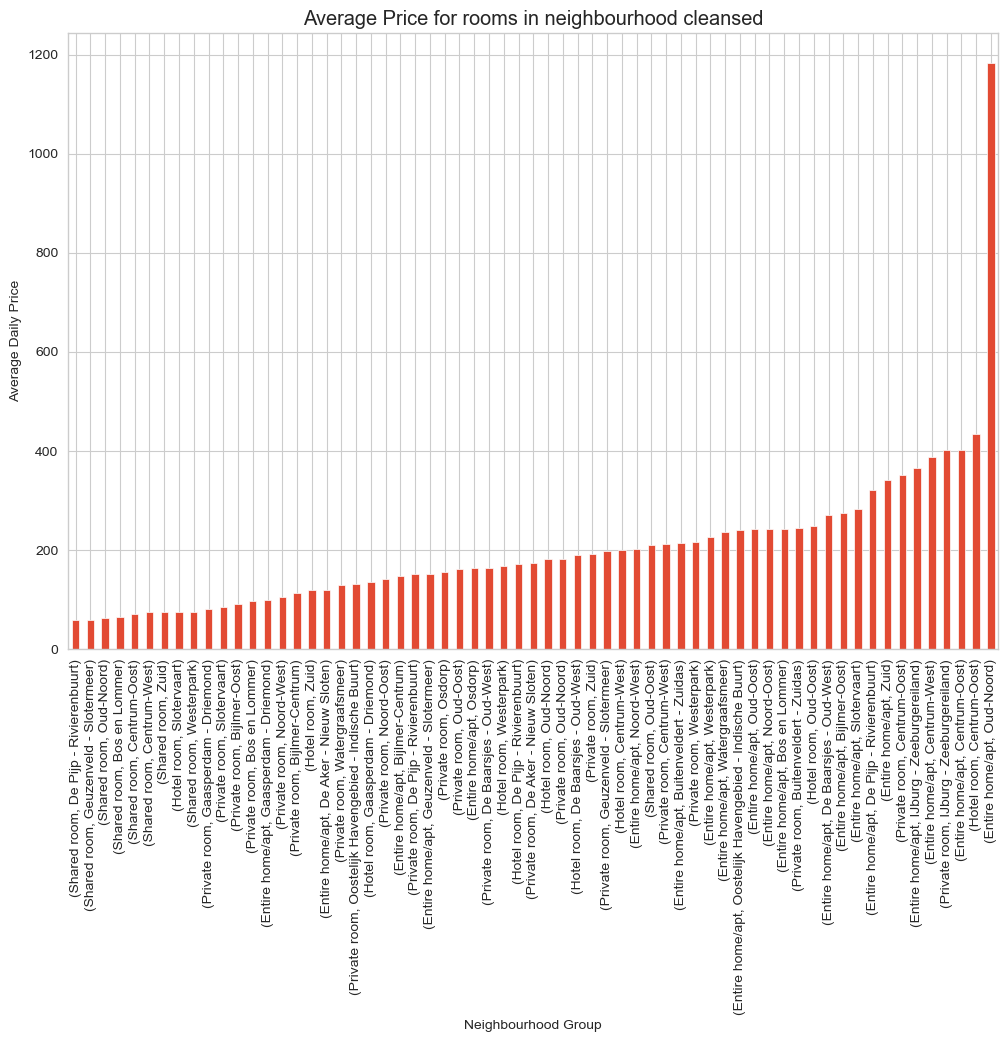

List of Average Price per night based on the neighbourhood cleansed


price
room_type       neighbourhood_cleansed              
Entire home/apt Oud-Noord                1183.757576
                Buitenveldert - Zuidas    213.733333
                Osdorp                    164.000000
                Westerpark                226.955556
                Geuzenveld - Slotermeer   151.357143
...                                              ...
Shared room     Centrum-Oost               72.000000
                Bos en Lommer              66.000000
                Oud-Noord                  62.100000
                Geuzenveld - Slotermeer    59.500000
                De Pijp - Rivierenbuurt    59.000000

[63 rows x 1 columns]

In [40]:
dataset_filled.head()
plt.figure(figsize=(12,8))
df = dataset_filled[dataset_filled['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_cleansed'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood cleansed')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood cleansed')
pd.DataFrame(df1).sort_values(by='room_type')

Top 10 most expensive localities in Airbnb_Amsterdam listings are:


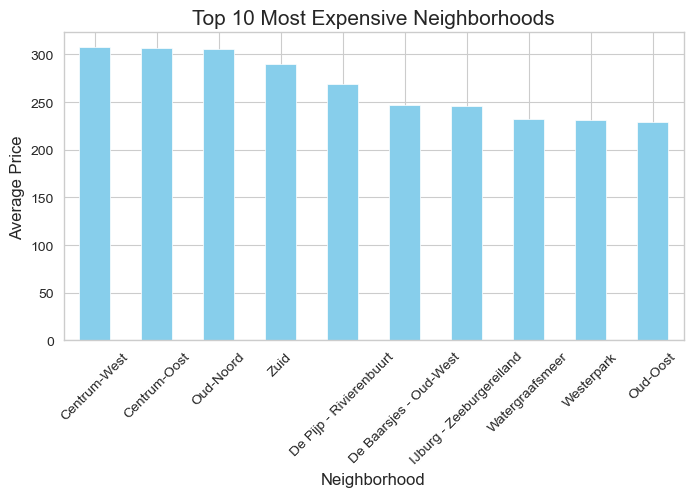

price
neighbourhood_cleansed              
Centrum-West              307.746521
Centrum-Oost              306.925599
Oud-Noord                 305.982587
Zuid                      290.227045
De Pijp - Rivierenbuurt   268.487701
De Baarsjes - Oud-West    246.507959
IJburg - Zeeburgereiland  245.677596
Watergraafsmeer           231.942748
Westerpark                231.142123
Oud-Oost                  229.537549

In [41]:
print('Top 10 most expensive localities in Airbnb_Amsterdam listings are:')

df4 = dataset_filled.dropna(subset=["price"]).groupby("neighbourhood_cleansed")["price"].mean().nlargest(10)

plt.figure(figsize=(8, 4))
df4.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Expensive Neighborhoods', fontsize=15)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45) 
plt.show()

pd.DataFrame(df4)

The figure below shows The top 15 neighborhoods based on the count of listings. And the best is De Baarsjes-Oud-West.

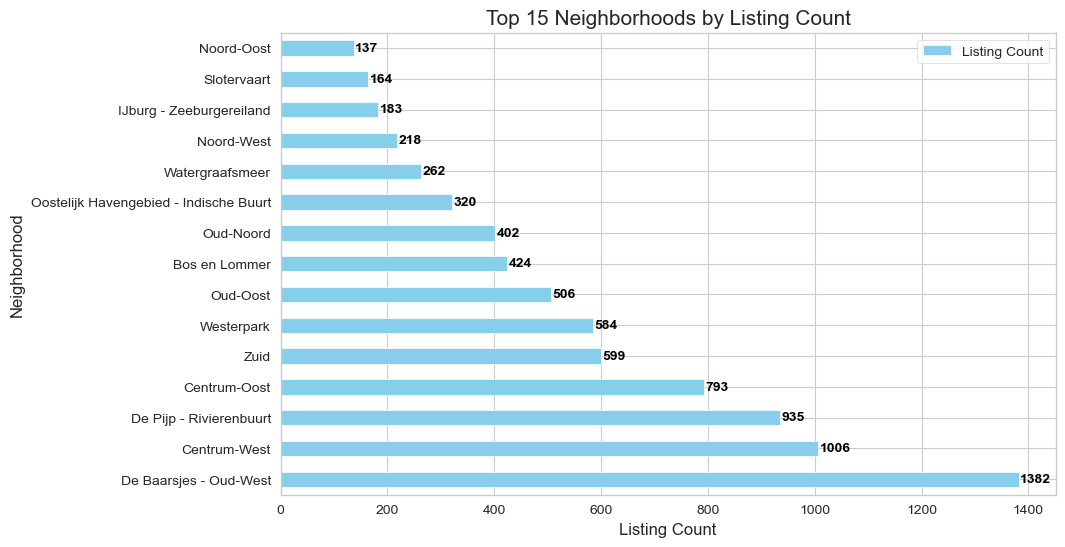

Listing Count
neighbourhood_cleansed                               
De Baarsjes - Oud-West                           1382
Centrum-West                                     1006
De Pijp - Rivierenbuurt                           935
Centrum-Oost                                      793
Zuid                                              599
Westerpark                                        584
Oud-Oost                                          506
Bos en Lommer                                     424
Oud-Noord                                         402
Oostelijk Havengebied - Indische Buurt            320
Watergraafsmeer                                   262
Noord-West                                        218
IJburg - Zeeburgereiland                          183
Slotervaart                                       164
Noord-Oost                                        137

In [42]:
df5 = dataset_filled.groupby('neighbourhood_cleansed')[['neighbourhood_cleansed','host_name']].agg(['count'])['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'count':'Listing Count'})

ax = df5.head(15).plot(kind='barh', color='skyblue', figsize=(10, 6))

for i, v in enumerate(df5.head(15)['Listing Count']):
    ax.text(v + 3, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Top 15 Neighborhoods by Listing Count', fontsize=15)
plt.xlabel('Listing Count', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.show()

df5.head(15)


Least Listing number of count


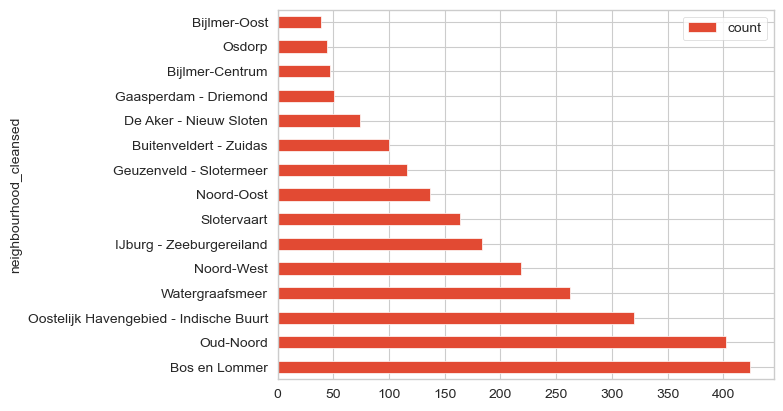

count
neighbourhood_cleansed                       
Bos en Lommer                             424
Oud-Noord                                 402
Oostelijk Havengebied - Indische Buurt    320
Watergraafsmeer                           262
Noord-West                                218
IJburg - Zeeburgereiland                  183
Slotervaart                               164
Noord-Oost                                137
Geuzenveld - Slotermeer                   116
Buitenveldert - Zuidas                    100
De Aker - Nieuw Sloten                     74
Gaasperdam - Driemond                      51
Bijlmer-Centrum                            47
Osdorp                                     44
Bijlmer-Oost                               39

In [43]:
print('Least Listing number of count')
df5 = dataset_filled.groupby('neighbourhood_cleansed')[['neighbourhood_cleansed','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})
df5.tail(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.tail(15))

A bar chart below shows the count of reviews for neighborhoods with a minimum of 50 reviews, and the highest number of reviews is in the Centrum-West.

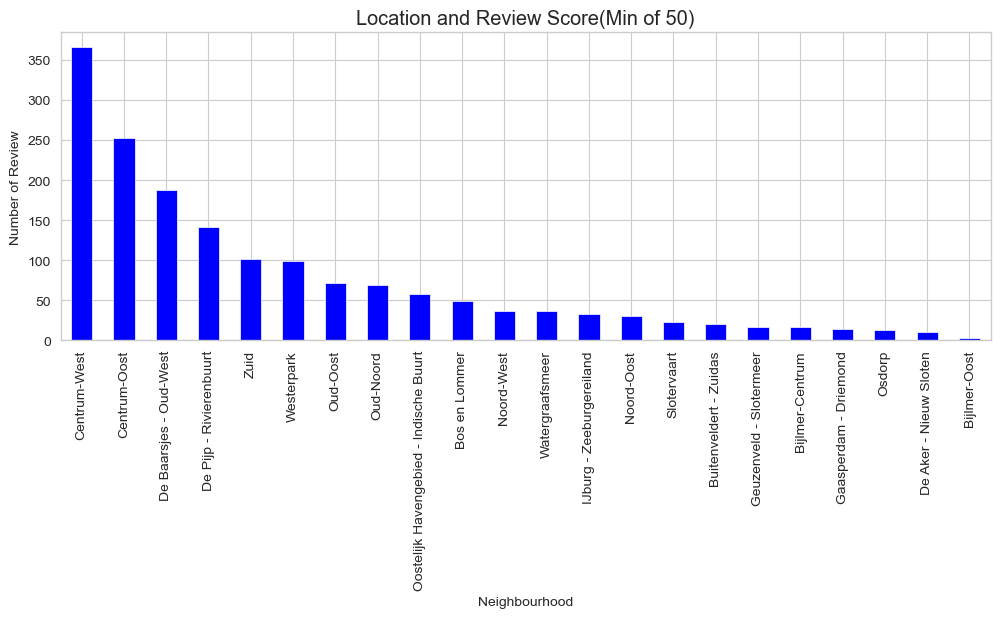

 Count of Review v/s neighbourhood


neighbourhood_cleansed
Centrum-West                                               366
Centrum-Oost                                               253
De Baarsjes - Oud-West                                     188
De Pijp - Rivierenbuurt                                    142
Zuid                                                       101
Westerpark                                                  99
Oud-Oost                                                    72
Oud-Noord                                                   69
Oostelijk Havengebied - Indische Buurt                      58
Bos en Lommer                                               49
Noord-West                                                  37
Watergraafsmeer                                             36
IJburg - Zeeburgereiland                                    33
Noord-Oost                                                  30
Slotervaart                                                 23
Buitenveldert - Zuidas                                      20
Geuzenveld - Slotermeer                                     17
Bijlmer-Centrum                                             17
Gaasperdam - Driemond                                       14
Osdorp                                                      13
De Aker - Nieuw Sloten                                      11
Bijlmer-Oost                                                 3

In [44]:
fig = plt.figure(figsize=(12,4))
review_50 = dataset_filled[dataset_filled['number_of_reviews']>=50]
df2 = review_50['neighbourhood_cleansed'].value_counts()
df2.plot(kind='bar',color=['b'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood')
plt.show()
print(' Count of Review v/s neighbourhood')
pd.DataFrame(df2)

In [45]:
map1=folium.Map([52.379189,4.899431],zoom_start=9.8)
location = ['latitude','longitude']
df = review_50[location]
HeatMap(df.dropna(),radius=8,gradient={.4: 'blue', .65: 'lime', 1: 'yellow'}).add_to(map1)
map1

Below we filter outliers based on z-scores and created a scatter plot of price versus availability. 

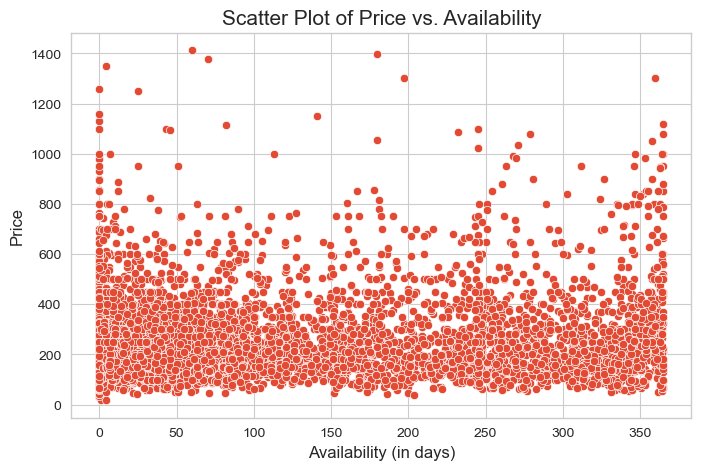

In [46]:
z_scores_price = np.abs((dataset_filled['price'] - dataset_filled['price'].mean()) / dataset_filled['price'].std())
z_scores_availability = np.abs((dataset_filled['availability_365'] - dataset_filled['availability_365'].mean()) / dataset_filled['availability_365'].std())
threshold = 3

filtered_dataset = dataset_filled[(z_scores_price < threshold) & (z_scores_availability < threshold)]

plt.figure(figsize=(8,5))
sns.scatterplot(y=filtered_dataset['price'], x=filtered_dataset['availability_365'])

plt.title('Scatter Plot of Price vs. Availability', fontsize=15)
plt.xlabel('Availability (in days)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [47]:
df6 = review_50.groupby(['neighbourhood_cleansed','room_type']).mean(numeric_only=True)
df6 = df6.drop(['id','calculated_host_listings_count','reviews_per_month'],axis=1)
pd.DataFrame(df6).sort_values('neighbourhood_cleansed')

scrape_id  \
neighbourhood_cleansed                 room_type                       
Bijlmer-Centrum                        Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
Bijlmer-Oost                           Private room     2.023090e+13   
Bos en Lommer                          Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
                                       Shared room      2.023090e+13   
Buitenveldert - Zuidas                 Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
Centrum-Oost                           Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
                                       Shared room      2.023090e+13   
Centrum-West                           Shared room      2.023090e+13   
                                       Private room     2.023090e+13   
                                       Entire home/apt  2.023090e+13   
                                       Hotel room       2.023090e+13   
De Aker - Nieuw Sloten                 Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
De Baarsjes - Oud-West                 Entire home/apt  2.023090e+13   
                                       Hotel room       2.023090e+13   
                                       Private room     2.023090e+13   
De Pijp - Rivierenbuurt                Entire home/apt  2.023090e+13   
                                       Hotel room       2.023090e+13   
                                       Private room     2.023090e+13   
Gaasperdam - Driemond                  Hotel room       2.023090e+13   
                                       Private room     2.023090e+13   
Geuzenveld - Slotermeer                Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
IJburg - Zeeburgereiland               Private room     2.023090e+13   
                                       Entire home/apt  2.023090e+13   
Noord-Oost                             Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
Noord-West                             Entire home/apt  2.023090e+13   
                                       Hotel room       2.023090e+13   
                                       Private room     2.023090e+13   
Oostelijk Havengebied - Indische Buurt Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
Osdorp                                 Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
Oud-Noord                              Shared room      2.023090e+13   
                                       Entire home/apt  2.023090e+13   
                                       Hotel room       2.023090e+13   
                                       Private room     2.023090e+13   
Oud-Oost                               Shared room      2.023090e+13   
                                       Private room     2.023090e+13   
                                       Entire home/apt  2.023090e+13   
                                       Hotel room       2.023090e+13   
Slotervaart                            Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
Watergraafsmeer                        Entire home/apt  2.023090e+13   
                                       Private room     2.023090e+13   
Westerpark                             Shared room      2.023090e+13   
                                       Entire home/apt  2.023090e+13   
                                       Hotel room       2.023090e+13   
                                       Private room     2.023090e+13   
Zuid                       

Below we analyse the distirbution of the room types in each location, and we can conclude, that for each location the Entire home/apt prevails․

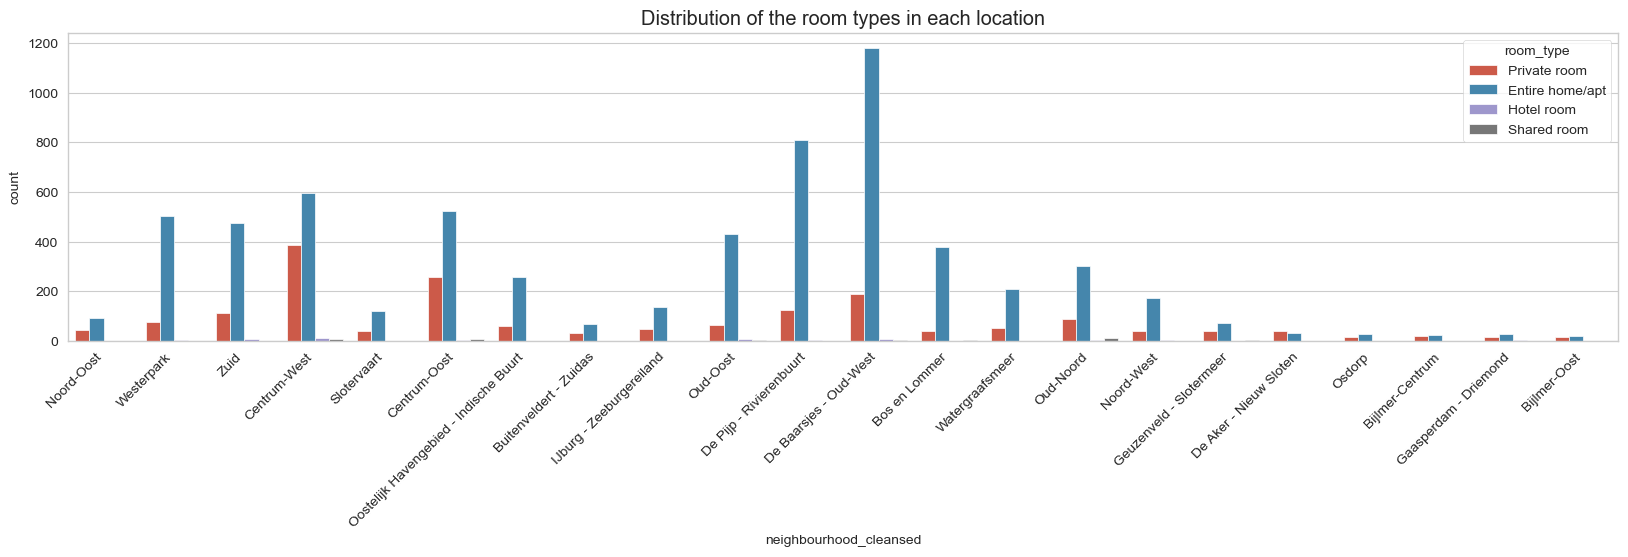

In [48]:
plt.figure(figsize=(20,4))
ax = sns.countplot(x=dataset_filled['neighbourhood_cleansed'], hue=dataset_filled['room_type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Distribution of the room types in each location')
plt.show()

### Most Expensive and The Cheapest Neighbourhoods

As can see from the figure below, the cheapest neighbourhood is Gaasperdam-Driemond, and the most expensive neighbourhood is Centrum-West.

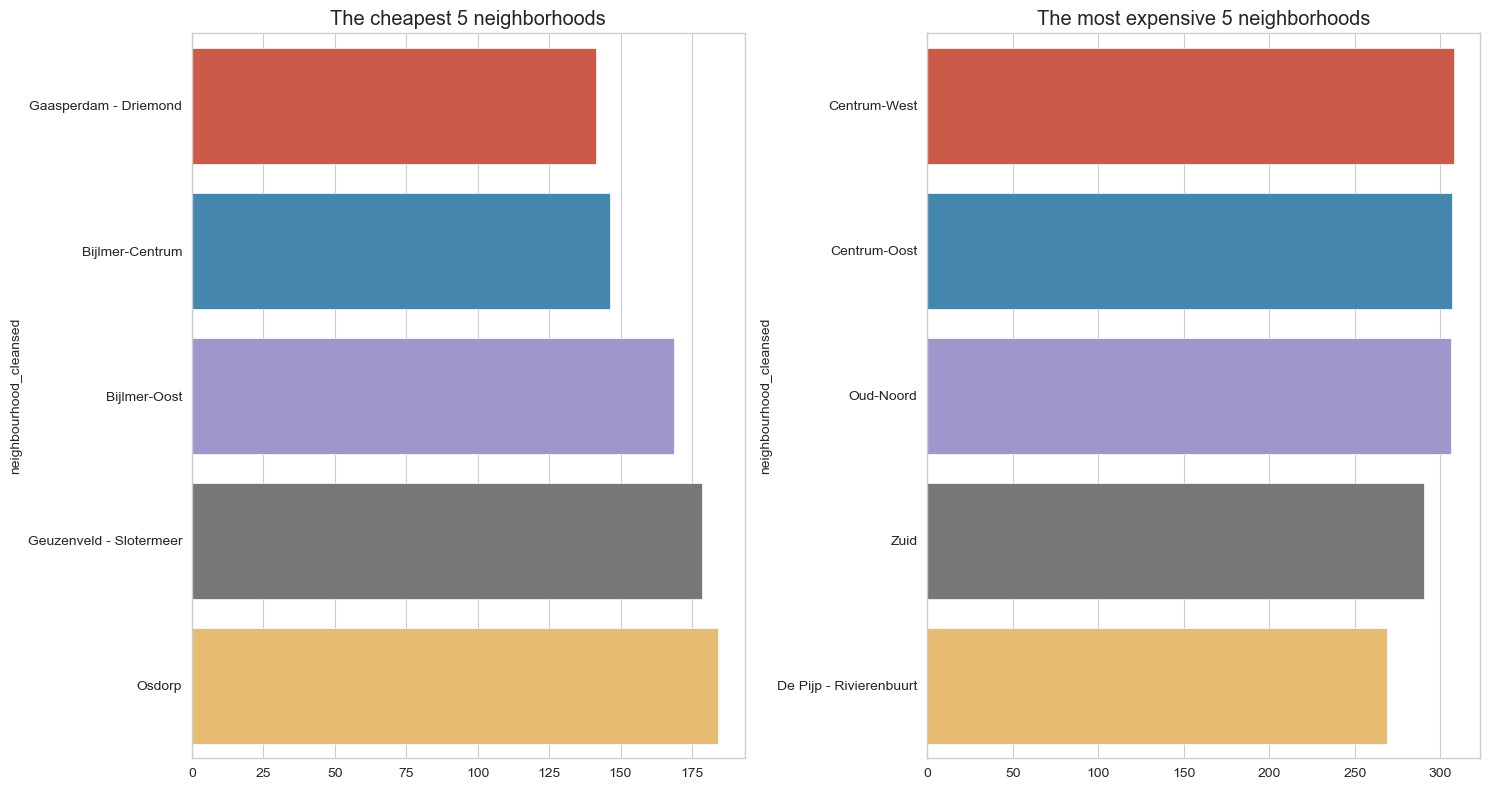

In [49]:
cheapest_neighborhoods = dataset_filled.groupby('neighbourhood_cleansed')['price'].mean().nsmallest(5)
expensive_neighborhoods = dataset_filled.groupby('neighbourhood_cleansed')['price'].mean().nlargest(5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))  

sns.barplot(y=cheapest_neighborhoods.index, x=cheapest_neighborhoods.values, ax=ax1)
ax1.set_title('The cheapest 5 neighborhoods')

sns.barplot(y=expensive_neighborhoods.index, x=expensive_neighborhoods.values, ax=ax2)
ax2.set_title('The most expensive 5 neighborhoods')

plt.tight_layout()  
plt.show()

Reviews Scores are mostly around 4 - 5. Then We will see if there is a correlation between review scores and the price.

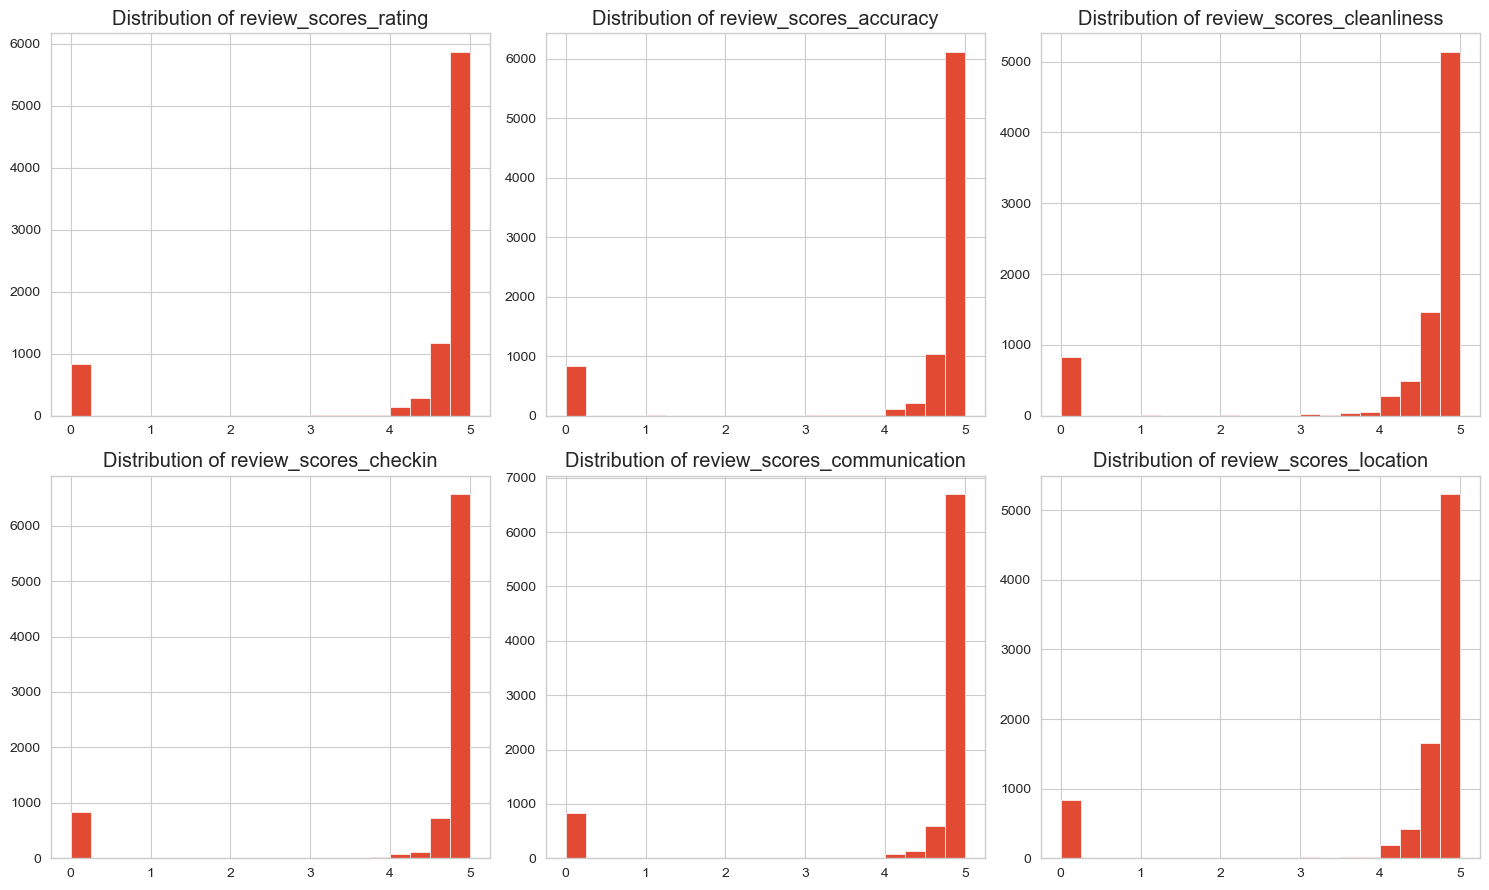

In [50]:
reviews = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
for ax, name in zip(axes.flatten(), reviews):
    ax.hist(dataset_filled[name], bins=20)
    ax.set_title(f"Distribution of {name}")

plt.tight_layout()
plt.show()

### Price distribution (Handling the Missing Values and Dropping the Outliers)


After dropping the outliers, It can be seen that mean of prices in Centrum-Oost are higher than the rest. Then, we will find out which room is the most expensive and which room type is the cheapest.

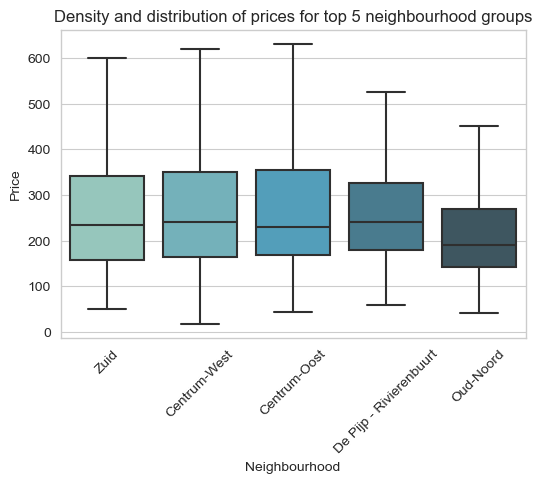

In [51]:
top_neighborhoods = dataset_filled.groupby('neighbourhood_cleansed')['price'].mean().nlargest(5).index
top_neighborhood_data = dataset_filled[dataset_filled['neighbourhood_cleansed'].isin(top_neighborhoods)]

plt.figure(figsize=(6,4))
sns.boxplot(data=top_neighborhood_data, x='neighbourhood_cleansed', y='price', palette='GnBu_d', showfliers=False)
plt.title('Density and distribution of prices for top 5 neighbourhood groups', fontsize=12)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=45)  
plt.show()

We can see , that the highest price is for Entire home/apt, then for hotel room, then fot private room, and then for shared room.

Text(0, 0.5, 'Price')

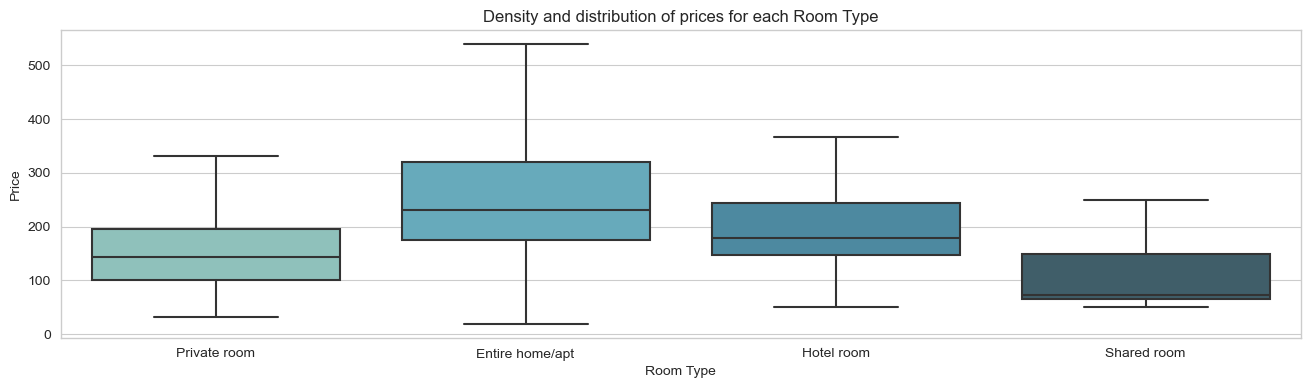

In [52]:
plt.figure(figsize=(16,4))
sns.boxplot(data=dataset_filled, x='room_type', y='price', palette='GnBu_d', showfliers=False)
plt.title('Density and distribution of prices for each Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel("Price")

Mostly houses are 2 accommodates.

<Figure size 600x500 with 0 Axes>

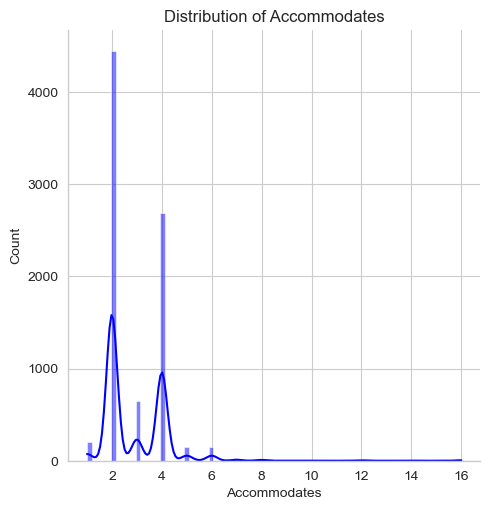

In [53]:
plt.figure(figsize=(6, 5))
sns.displot(dataset_filled['accommodates'], kde=True, color='blue')
plt.title('Distribution of Accommodates', fontsize=12)
plt.xlabel('Accommodates')
plt.show()

Below, It can be seen that prices are mostly around between 100 and 300 dollars.

<Figure size 500x300 with 0 Axes>

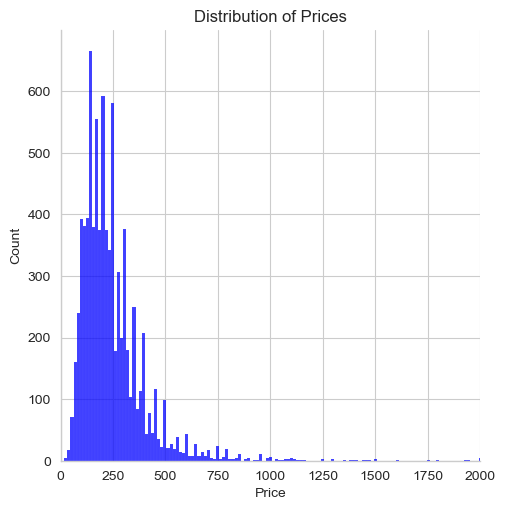

In [54]:
plt.figure(figsize=(5, 3))
sns.displot(dataset_filled['price'], kde=False, color='blue')
plt.title('Distribution of Prices', fontsize=12)
plt.xlabel('Price')
plt.xlim(0, 2000)
plt.show()

When we plot the price in logarithmic case, the distribution likes the normal distribution. The skewed data turned to like a normal distribution.

<Figure size 400x400 with 0 Axes>

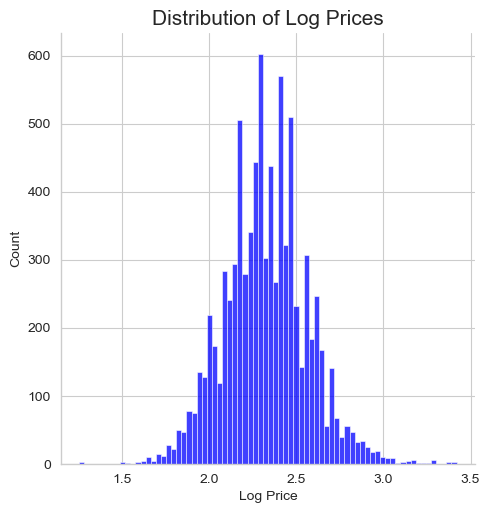

In [60]:
plt.figure(figsize=(4, 4))
dataset_filled['log_price'] = np.log10(dataset_filled['price'])
sns.displot(dataset_filled['log_price'], kde=False, color='blue')
plt.title('Distribution of Log Prices', fontsize=15)
plt.xlabel('Log Price')
plt.show()

In [61]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

def check_dist(price):
    print('Checking the statistical distribution of prices')
    print(price.describe())
    
    print('Fitting the prices into normal distribution')
    sns.distplot(price, fit=norm)

    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')

    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()

The distribution of price is highly skewed. Also, there are several outlier when the price is above 5000. We have to remove outliers and then correct the distribution the price by log function.

Checking the statistical distribution of prices
count    8381.000000
mean      247.153681
std       167.502393
min        18.000000
25%       150.000000
50%       207.000000
75%       300.000000
max      2629.000000
Name: price, dtype: float64
Fitting the prices into normal distribution


C:\Users\user\AppData\Local\Temp\ipykernel_18048\3058323641.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price, fit=norm)



 mu = 247.15 and sigma = 167.49



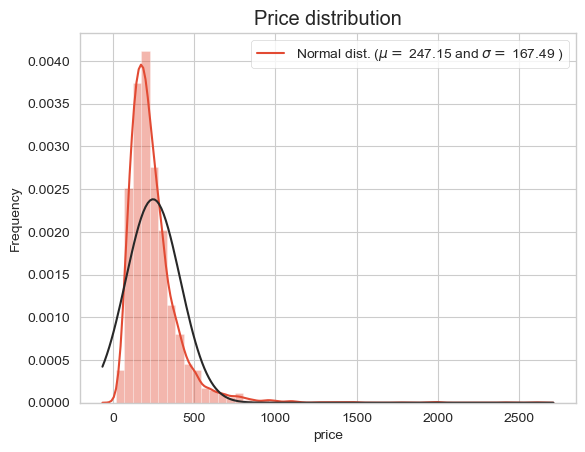

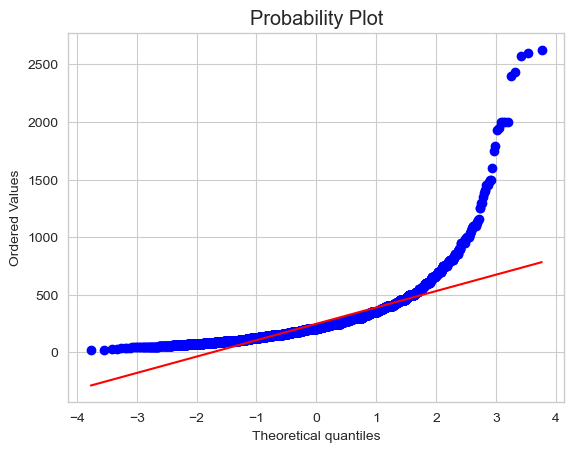

In [62]:
check_dist(dataset_filled['price'])

In [63]:
dataset_filled = dataset_filled[dataset_filled['price']<5000]

Checking the statistical distribution of prices
count    8381.000000
mean      247.153681
std       167.502393
min        18.000000
25%       150.000000
50%       207.000000
75%       300.000000
max      2629.000000
Name: price, dtype: float64
Fitting the prices into normal distribution


C:\Users\user\AppData\Local\Temp\ipykernel_18048\638744903.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price, fit=norm)



 mu = 247.15 and sigma = 167.49



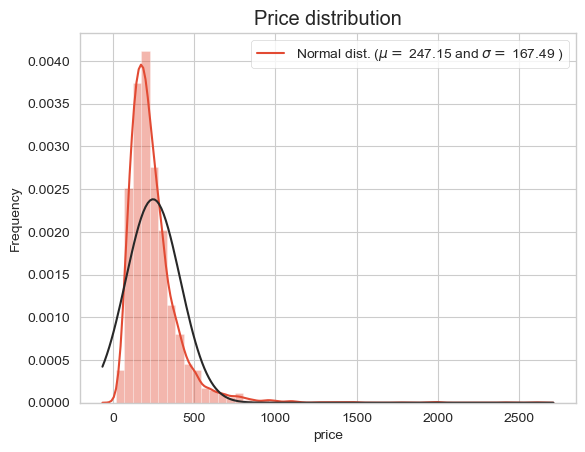

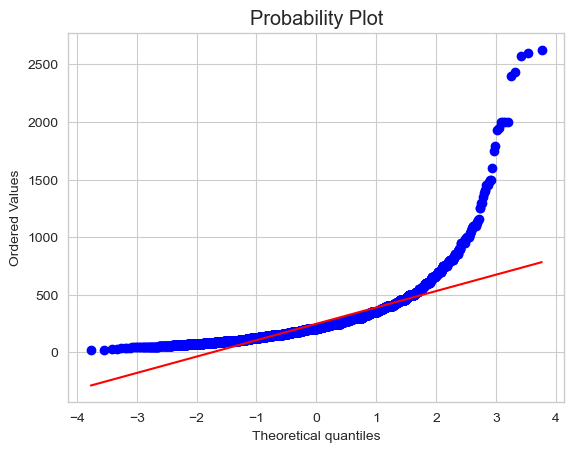

0        61.0
1       327.0
2       109.0
3       290.0
4       150.0
        ...  
8381    250.0
8382    337.0
8383    135.0
8384    160.0
8385    211.0
Name: price, Length: 8381, dtype: float64

In [64]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

def check_dist(price):
    print('Checking the statistical distribution of prices')
    print(price.describe())

    print('Fitting the prices into normal distribution')
    sns.distplot(price, fit=norm)

    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
               loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')

    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()

    return price

check_dist(dataset_filled['price'])


We've calculated the correlation matrix and created a heatmap to visualize the correlations between different features. There is a relationships between accommodates and the price.Because, when the number of people that can stay in a room increase, the price will increase naturally. There is also a correlation between bedrooms, beds and availability to price. There is also a negative correlation between maximum nights and the price. When the amount of nights increase, the price per night decreases.

<Axes: >

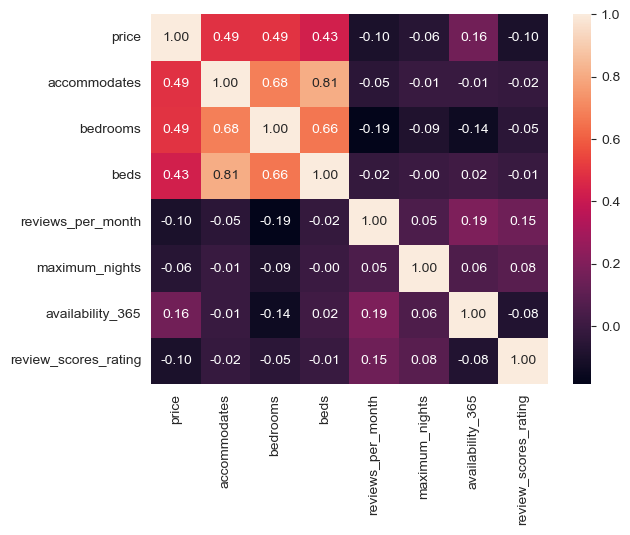

In [65]:
corr = dataset_filled[['price', 'accommodates', 'bedrooms', 'beds', 'reviews_per_month', 'maximum_nights', 'availability_365', 'neighbourhood_cleansed', 'review_scores_rating', 'property_type', 'room_type']].corr(numeric_only=True)

sns.heatmap(corr, fmt='.2f', annot=True)

### Regression Modelling

In [66]:
columns_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms', 'bathrooms_text', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

dataset_filled.drop(columns=columns_to_drop, inplace=True)


In [67]:
dataset_filled.dtypes

host_location                   object
host_neighbourhood              object
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
beds                           float64
amenities                       object
price                          float64
minimum_nights                   int64
maximum_nights                   int64
availability_365                 int64
number_of_reviews                int64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
log_price                      float64
dtype: object

Encoding, as we have objects. 

In [68]:
from sklearn.preprocessing import LabelEncoder

categorical = dataset_filled.select_dtypes(include=['object']).columns


for i in categorical:
    dataset_filled[i] = dataset_filled[i].astype(str)

for i in categorical:
    dataset_filled[i] = LabelEncoder().fit_transform(dataset_filled[i])


In [69]:
dataset_filled.dtypes

host_location                    int32
host_neighbourhood               int32
neighbourhood_cleansed           int32
latitude                       float64
longitude                      float64
property_type                    int32
room_type                        int32
accommodates                     int64
bedrooms                       float64
beds                           float64
amenities                        int32
price                          float64
minimum_nights                   int64
maximum_nights                   int64
availability_365                 int64
number_of_reviews                int64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
log_price                      float64
dtype: object

In [70]:
dataset_filled= dataset_filled.reset_index(drop=True)

dataset_filled.head()

host_location  host_neighbourhood  neighbourhood_cleansed  latitude  \
0              9                  34                      12  52.40164   
1              9                  63                      20  52.38855   
2              9                  44                      20  52.37824   
3              9                  45                      21  52.34091   
4              9                  23                       5  52.37641   

   longitude  property_type  room_type  accommodates  bedrooms  beds  ...  \
0    4.95106             26          2             1       0.0   1.0  ...   
1    4.88521             14          0             2       1.0   1.0  ...   
2    4.86826             22          2             2       0.0   1.0  ...   
3    4.84802             19          0             4       3.0   3.0  ...   
4    4.88303             36          2             2       0.0   1.0  ...   

   maximum_nights  availability_365  number_of_reviews  \
0             365               272                303   
1            1125                16                 78   
2             730                29                341   
3              35                 0                 10   
4               5               196                699   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.81                       4.89                   4.82   
1                    4.94                       4.91                   4.94   
2                    4.81                       4.84                   4.87   
3                    5.00                       5.00                   5.00   
4                    4.88                       4.90                   4.93   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.92                    4.42                 4.65   
1                         4.94                    4.86                 4.77   
2                         4.87                    4.72                 4.68   
3                         5.00                    4.67                 4.56   
4                         4.91                    4.96                 4.79   

   log_price  
0   1.785330  
1   2.514548  
2   2.037426  
3   2.462398  
4   2.176091  

[5 rows x 23 columns]

We will determine train data and target column. After that scale the data. Split the data as:

Training: 80%
Test : 20%

In [96]:
dataset_filled.drop(columns=['log_price'], inplace=True)

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = dataset_filled.drop(columns=['price'])
y = dataset_filled['price']

columns = X.columns
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"There are {X_train.shape[0]} traning data")
print(f"There are {X_test.shape[0]} test data")

X.head()

There are 6704 traning data
There are 1677 test data


host_location  host_neighbourhood  neighbourhood_cleansed  latitude  \
0      -0.213447            1.158799                0.254177  2.038602   
1      -0.213447            2.683635                1.548872  1.277083   
2      -0.213447            1.684605                1.548872  0.677292   
3      -0.213447            1.737185                1.710708 -1.494404   
4      -0.213447            0.580413               -0.878681  0.570831   

   longitude  property_type  room_type  accommodates  bedrooms      beds  \
0   1.728976       0.884330   1.834453     -1.431778 -1.301486 -0.564056   
1  -0.130652      -0.275298  -0.538529     -0.678736 -0.358724 -0.564056   
2  -0.609326       0.497787   1.834453     -0.678736 -1.301486 -0.564056   
3  -1.180912       0.207880  -0.538529      0.827350  1.526799  0.819830   
4  -0.192216       1.850687   1.834453     -0.678736 -1.301486 -0.564056   

   minimum_nights  maximum_nights  availability_365  number_of_reviews  \
0       -0.058984       -0.057626          1.668885           2.398527   
1       -0.058984        1.565015         -0.588055           0.303053   
2       -0.087787        0.721669         -0.473444           2.752429   
3       -0.058984       -0.762194         -0.729113          -0.330245   
4       -0.116590       -0.826246          0.998856           6.086560   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                0.301079                   0.409482               0.285133   
1                0.389650                   0.423202               0.366461   
2                0.301079                   0.375182               0.319020   
3                0.430529                   0.484943               0.407125   
4                0.348771                   0.416342               0.359684   

   review_scores_communication  review_scores_location  review_scores_value  
0                     0.342171                0.069856             0.331461  
1                     0.355696                0.372526             0.415912  
2                     0.308359                0.276222             0.352574  
3                     0.396270                0.241827             0.268123  
4                     0.335409                0.441314             0.429987

### Model training

Then we have to Train in Various Models. Our goal is to try to minimize the mean_squared_error (with using hyperparameter tuning and cross validation). Then the results will help us to compare the models and find out which model performed best. 
KNN will be used for regression. We will try KNeighborsRegressor for our price prediction goal.

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(5, metric="euclidean")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Absolute Error: {}".format(rmse))
print("R2 score: {}".format(r2))

Mean Squared Error: 16019.499463327369
Mean Absolute Error: 77.94287418008348
Root Mean Absolute Error: 126.56816133343871
R2 score: 0.3812348902146183


R2 score is 0.3812 which means there is a correlation between the predictions and the actual values. The mean squared Error is 16019,5.

In [100]:
prediction_dictionaries = {'KNN-Default': y_pred}

In [101]:
prediction_list = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'KNN-Default': y_pred.flatten()}).head(20)
prediction_list.set_index('Actual Values', inplace=True)
prediction_list

KNN-Default
Actual Values             
175.0                224.8
550.0                284.6
294.0                336.2
89.0                 189.8
163.0                216.8
226.0                276.0
155.0                128.8
85.0                 119.6
430.0                383.8
350.0                190.8
305.0                342.0
449.0                549.6
391.0                481.8
160.0                232.0
250.0                224.6
209.0                242.8
118.0                119.2
310.0                364.0
222.0                187.6
56.0                  65.6

In [102]:
error_dict = {'KNN Default': [mse, r2]}
error_list = pd.DataFrame()
error_list['KNN Default'] = [mse, r2]
error_list.reset_index(inplace=True, drop=True)
#error_list.rename(columns={0: 'MSE KNN Default'}, inplace=True)
error_list.index =['Mean Squared Error', 'R2 Score']
error_list.T

Mean Squared Error  R2 Score
KNN Default        16019.499463  0.381235

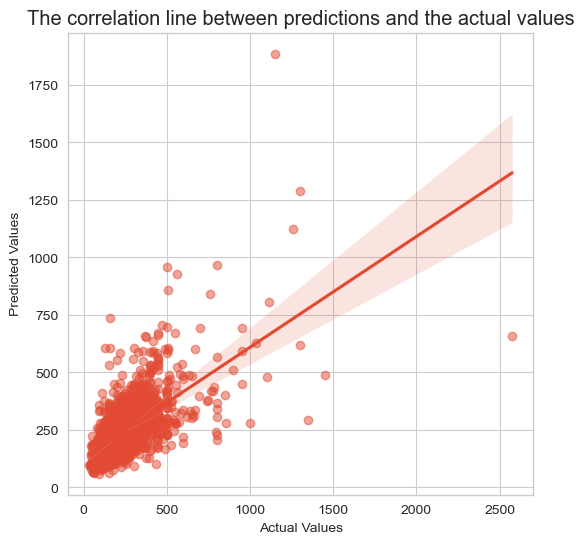

In [104]:
plt.figure(figsize=(6,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.title("The correlation line between predictions and the actual values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


In [105]:
def plot_all_r2():
  length = len(prediction_dictionaries)
  n_col = 2
  if length < 2:
    n_col = length % 2
  
  nrow = 1
  if(length > 2):
    nrow = int(length / 2) 
    if length % 2 != 0:
      nrow+=1
  
  fig, axes = plt.subplots(nrow, n_col, figsize=( 16, 3 * length))
  for ax, key in zip(axes.flatten(), prediction_dictionaries.keys()):
    sns.regplot(prediction_dictionaries[key], y_test, ax=ax)
    ax.set_title("The correlation line in {}".format(key))
    plt.show()

We use GridSearchCV to perform hyperparameter tuning for a K-Nearest Neighbors (KNN) regression model.
param_grid defines the grid of hyperparameters that GridSearchCV will search over. It specifies two hyperparameters for the KNN model: 'p' (which represents the power parameter for the Minkowski distance metric) and 'n_neighbors' (the number of neighbors to consider). 
GridSearchCV object takes several parameters, such as 
KNeighborsRegressor(n_jobs=-1): This is the base estimator, which is a KNN regressor. n_jobs=-1 indicates that the computation should be parallelized across all available processors.
GridSearchCV search The grid of hyperparameters, After finding the best hyperparameters, refit the estimator using the best found parameters on the whole dataset, then Display progress messages at every 10th iteration and Use all available processors for parallelizing the grid search. And as we split the data by 80 training and 20 test data. We will do 100 / 20 = 5 cross validation splits. The model will Use mean squared error as the scoring metric. The negative sign indicates that GridSearchCV will look for the maximum value of this metric.  And finally, It searches through the hyperparameter grid defined in param_grid to find the best combination of hyperparameters that minimizes the mean squared error.
So, It calculates all the scores and finds the model which performed best.

In [106]:
from sklearn.model_selection import GridSearchCV
param_grid = {'p': [1, 2], 'n_neighbors' : [ 5, 10, 15]} 

grid_knn = GridSearchCV(KNeighborsRegressor(n_jobs=-1), param_grid, refit = True, verbose = 10, n_jobs=-1, cv=5,scoring="neg_mean_squared_error") 

grid_knn.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15], 'p': [1, 2]},
             scoring='neg_mean_squared_error', verbose=10)

In [107]:
print(f"Best parameters are {grid_knn.best_params_}") 
print("Best score is {}".format(grid_knn.best_score_ * -1))
print("Best model is {}".format(grid_knn.best_estimator_))

Best parameters are {'n_neighbors': 10, 'p': 1}
Best score is 16698.013745649052
Best model is KNeighborsRegressor(n_jobs=-1, n_neighbors=10, p=1)


In [108]:
knr_best = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=1,
                    weights='uniform')
knr_best.fit(X_train, y_train)
y_pred_best = knr_best.predict(X_test)

mse_knn_best = mean_squared_error(y_pred_best, y_test)
mae_knn_best = mean_absolute_error(y_pred, y_test)
rmse_knn_best = np.sqrt(mse)
r2_knn_best = r2_score(y_test, y_pred_best)

print("Mean Squared Error: {}".format(mse_knn_best))
print("Mean Absolute Error: {}".format(mae_knn_best))
print("Root Mean Absolute Error: {}".format(rmse_knn_best))
print("R2 score: {}".format(r2_knn_best))

Mean Squared Error: 14547.483758033526
Mean Absolute Error: 77.94287418008348
Root Mean Absolute Error: 126.56816133343871
R2 score: 0.43809259426317937


In [109]:
prediction_dictionaries['Knn-Best']   = y_pred_best

In [110]:
prediction_list['KNN-Best'] = y_pred_best[:20]
prediction_list

KNN-Default    KNN-Best
Actual Values                         
175.0                224.8  259.200000
550.0                284.6  346.600000
294.0                336.2  375.333333
89.0                 189.8  171.466667
163.0                216.8  231.600000
226.0                276.0  248.800000
155.0                128.8  140.066667
85.0                 119.6  111.800000
430.0                383.8  513.266667
350.0                190.8  187.666667
305.0                342.0  421.466667
449.0                549.6  433.200000
391.0                481.8  399.066667
160.0                232.0  255.133333
250.0                224.6  223.266667
209.0                242.8  235.200000
118.0                119.2  118.000000
310.0                364.0  301.466667
222.0                187.6  199.533333
56.0                  65.6  102.866667

In [111]:
error_list['MSE KNN-Best'] = [mse_knn_best, r2_knn_best]
error_list.T

Mean Squared Error  R2 Score
KNN Default         16019.499463  0.381235
MSE KNN-Best        14547.483758  0.438093

there is an improvement in the best model in both of the metrics.

Then We train a Support Vector Regression (SVR) model, specifically a LinearSVR. LinearSVR is an implementation of Support Vector Regression for linear kernels. Firstly it fits (trains) the LinearSVR model on the training data X_train (features) and y_train (target variable). After training, the model is used to make predictions on the test data X_test. Then we compute various evaluation metrics for the SVR model, including Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2) score. So, This trains a LinearSVR model on our training data, makes predictions on the test data, and then computes and prints out various evaluation metrics to assess the performance of the model. In most regression cases LinearSVR perform faster and more accurate results.

In [112]:
from sklearn.svm import LinearSVR, SVR
clf_svr = LinearSVR()
clf_svr.fit(X_train, y_train)

preds_svr = clf_svr.predict(X_test)

mse_svr = mean_squared_error(preds_svr, y_test)
mae_svr = mean_absolute_error(preds_svr, y_test)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, preds_svr)

print("Mean Squared Error: {}".format(mse_svr))
print("Mean Absolute Error: {}".format(mae_svr))
print("Root Mean Absolute Error: {}".format(rmse_svr))
print("R2 Score: {}".format(r2_svr))

Mean Squared Error: 16537.36432646669
Mean Absolute Error: 75.81237527349342
Root Mean Absolute Error: 128.59768398562505
R2 Score: 0.36123197379216987


C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


The error is 16537.4 which is worse than KNN.

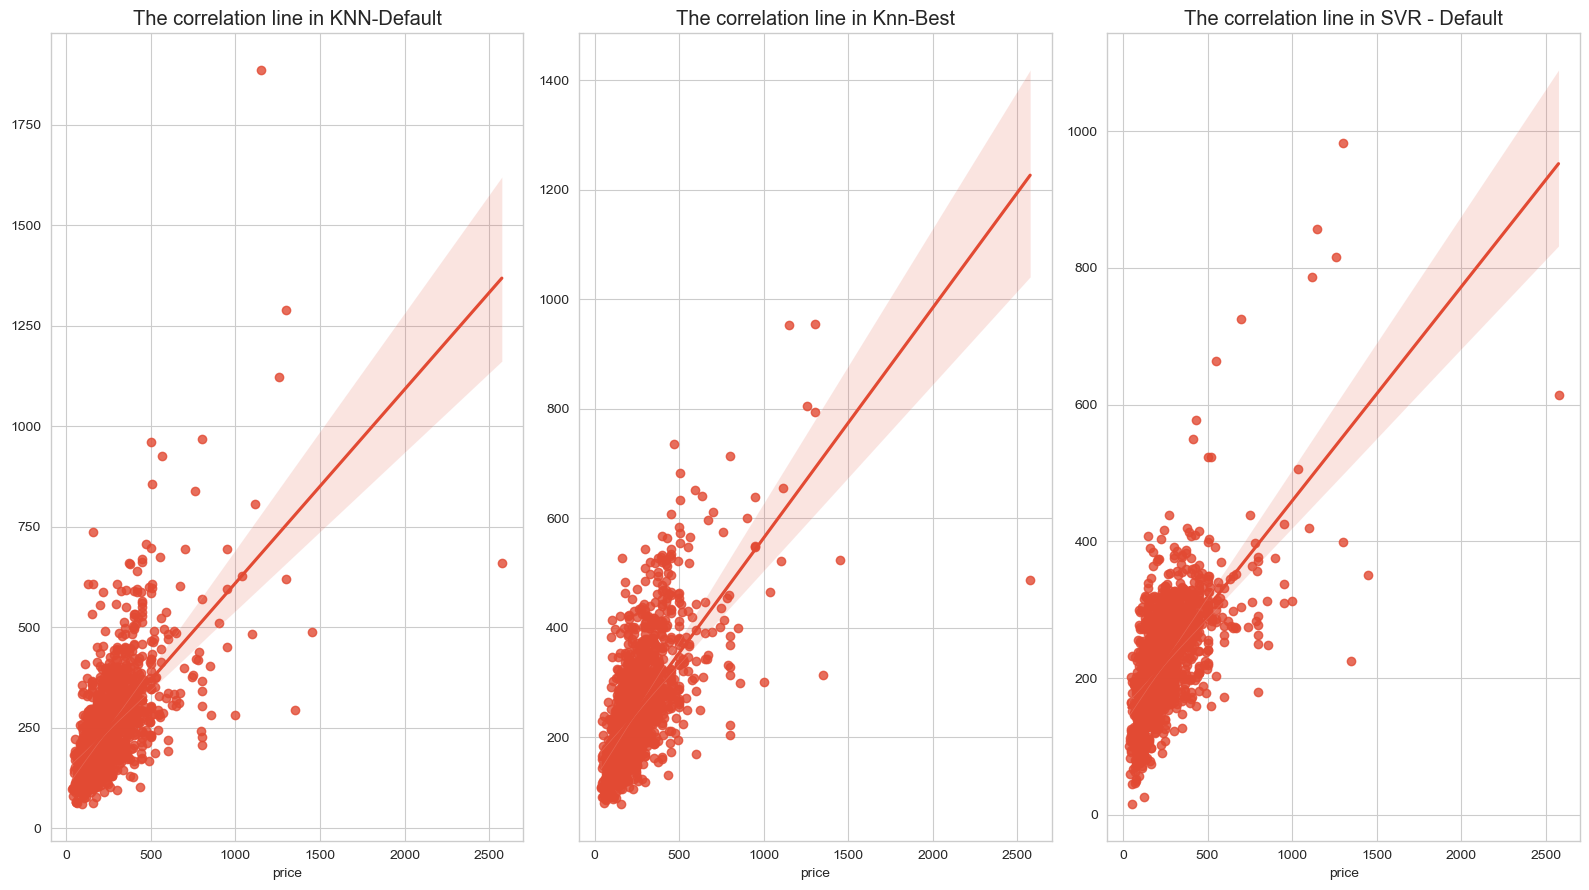

In [115]:
def plot_all_r2():
    nrow = 1
    n_col = len(prediction_dictionaries)
    length = len(prediction_dictionaries)
    fig, axes = plt.subplots(nrow, n_col, figsize=(16, 3 * length))
    
    for ax, key in zip(axes.flatten(), prediction_dictionaries.keys()):
        sns.regplot(x=y_test, y=prediction_dictionaries[key], ax=ax)
        ax.set_title("The correlation line in {}".format(key))
    
    plt.tight_layout()
    plt.show()

plot_all_r2()


As the graph shows there is a correlation between predictions and the actual values. It means model predictions consistent with the actual values. The other comment is that the line in KNN_best is better than the first model. The reason for that second model checks for more neighbours, therefore the result for the second model is more consistent.

In [116]:
prediction_list['SVR-Default'] = np.array(preds_svr[:20])
prediction_list

KNN-Default    KNN-Best  SVR-Default
Actual Values                                      
175.0                224.8  259.200000   276.889326
550.0                284.6  346.600000   286.447631
294.0                336.2  375.333333   260.436080
89.0                 189.8  171.466667   189.729036
163.0                216.8  231.600000   210.925055
226.0                276.0  248.800000   216.128929
155.0                128.8  140.066667   172.172835
85.0                 119.6  111.800000   103.563839
430.0                383.8  513.266667   312.640667
350.0                190.8  187.666667   126.569024
305.0                342.0  421.466667   283.425159
449.0                549.6  433.200000   313.755513
391.0                481.8  399.066667   313.872833
160.0                232.0  255.133333   147.650562
250.0                224.6  223.266667   226.951633
209.0                242.8  235.200000   125.775958
118.0                119.2  118.000000    94.077481
310.0                364.0  301.466667   263.902142
222.0                187.6  199.533333   183.506623
56.0                  65.6  102.866667   106.457654

In [117]:
error_list['SVR Default'] = [mse_svr, r2_svr]
error_list.T

Mean Squared Error  R2 Score
KNN Default         16019.499463  0.381235
MSE KNN-Best        14547.483758  0.438093
SVR Default         16537.364326  0.361232

Based on these results, the "Best" K-Nearest Neighbors model (presumably with hyperparameters tuned through GridSearchCV) outperforms both the default KNN and the SVR models in terms of both MSE and R2 Score. This indicates that the "Best" KNN model provides better predictions on the test data.
Lower MSE and higher R2 Score are indicative of better model performance. These metrics provide different perspectives on model performance, so it's good to consider both.

Then, we performe a grid search for hyperparameter tuning on a Support Vector Machine for regression (SVR) model using the GridSearchCV from scikit-learn. The hyperparameters we tune are:

C: The regularization parameter.
loss: The loss function to be used.
dual: Whether to solve the dual or primal optimization problem.
tol: The tolerance for stopping criteria.
The grid search will search through the combinations of these hyperparameters to find the best combination that minimizes the mean squared error (neg_mean_squared_error) using 5-fold cross-validation.

In [119]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'], 
              'dual': [True, False],
              'tol': [0.0001, 0.00001]} 
svm_model = SVR(max_iter=10000)

grid = GridSearchCV(LinearSVR(), param_grid, refit = True, verbose = 10, n_jobs=-1, cv=5,scoring="neg_mean_squared_error") 

grid.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 568, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\us

GridSearchCV(cv=5, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'dual': [True, False],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'tol': [0.0001, 1e-05]},
             scoring='neg_mean_squared_error', verbose=10)

In [120]:
print(f"Best parameters are {grid.best_params_}") 
print("Best score is {}".format(grid.best_score_ * -1))
print("Best model is {}".format(grid.best_estimator_))
print("scores {}".format(grid.cv_results_['mean_test_score']))

Best parameters are {'C': 1, 'dual': True, 'loss': 'squared_epsilon_insensitive', 'tol': 1e-05}
Best score is 17849.397055062585
Best model is LinearSVR(C=1, dual=True, loss='squared_epsilon_insensitive', tol=1e-05)
scores [-23757.15066049 -23786.16423301 -17865.2869986  -17864.94289283
             nan             nan -17864.97471871 -17864.96792692
 -19377.78379685 -19386.99522543 -17858.71221497 -17849.39705506
             nan             nan -17868.74470479 -17868.73722297
 -19055.33101514 -19048.20707739 -18391.94412415 -18173.2534027
             nan             nan -17869.25551728 -17869.24500581
 -18990.60660617 -18978.53822592 -26487.71250859 -29466.3640594
             nan             nan -17869.30735301 -17869.29687598
 -18850.68525439 -19304.86856305 -30484.08247003 -35817.75367917
             nan             nan -17869.31255588 -17869.30209629]


In [121]:
svr_best = LinearSVR(C=1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

svr_best.fit(X_train, y_train)

preds_svr_best = svr_best.predict(X_test)

mse_svr_best = mean_squared_error(preds_svr_best, y_test)
mae_svr_best = mean_absolute_error(preds_svr_best, y_test)
rmse_svr_best = np.sqrt(mse_svr_best)
r2_svr_best = r2_score(y_test, preds_svr_best)

print("Mean Squared Error: {}".format(mse_svr_best))
print("Mean Absolute Error: {}".format(mae_svr_best))
print("Root Mean Absolute Error: {}".format(rmse_svr_best))
print("R2 Score: {}".format(r2_svr_best))

Mean Squared Error: 16543.10681524774
Mean Absolute Error: 75.83058265835773
Root Mean Absolute Error: 128.62000938908275
R2 Score: 0.36101016588180546


In [122]:
error_list['SVR Best'] = [mse_svr_best, r2_svr_best]
error_list.T

Mean Squared Error  R2 Score
KNN Default         16019.499463  0.381235
MSE KNN-Best        14547.483758  0.438093
SVR Default         16537.364326  0.361232
SVR Best            16543.106815  0.361010

Based on these metrics, it seems that the KNN model with hyperparameter tuning (KNN Best) performs the best in terms of both MSE and R2 Score. 

### Random forest

We've trained a Random Forest Regressor and evaluated its performance using various metrics. 
These metrics provide an indication of how well the Random Forest Regressor is performing on our dataset. 

In [127]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=42) #n_estimators is 100 by default
forest_model.fit(X_train, y_train)
forest_model_prediction = forest_model.predict(X_test)

forest_mse = metrics.mean_squared_error(y_test, forest_model_prediction)
forest_mae = metrics.mean_absolute_error(y_test, forest_model_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = metrics.r2_score(y_test, forest_model_prediction)

print("Mean Squared Error: {}".format(forest_mse))
print("Mean Absolute Error: {}".format(forest_mae))
print("Root Mean Absolute Error: {}".format(forest_rmse))
print("R2 score: {}".format(forest_r2))

Mean Squared Error: 13357.157403041147
Mean Absolute Error: 71.46565891472868
Root Mean Absolute Error: 115.57316904472745
R2 score: 0.48406983714853913


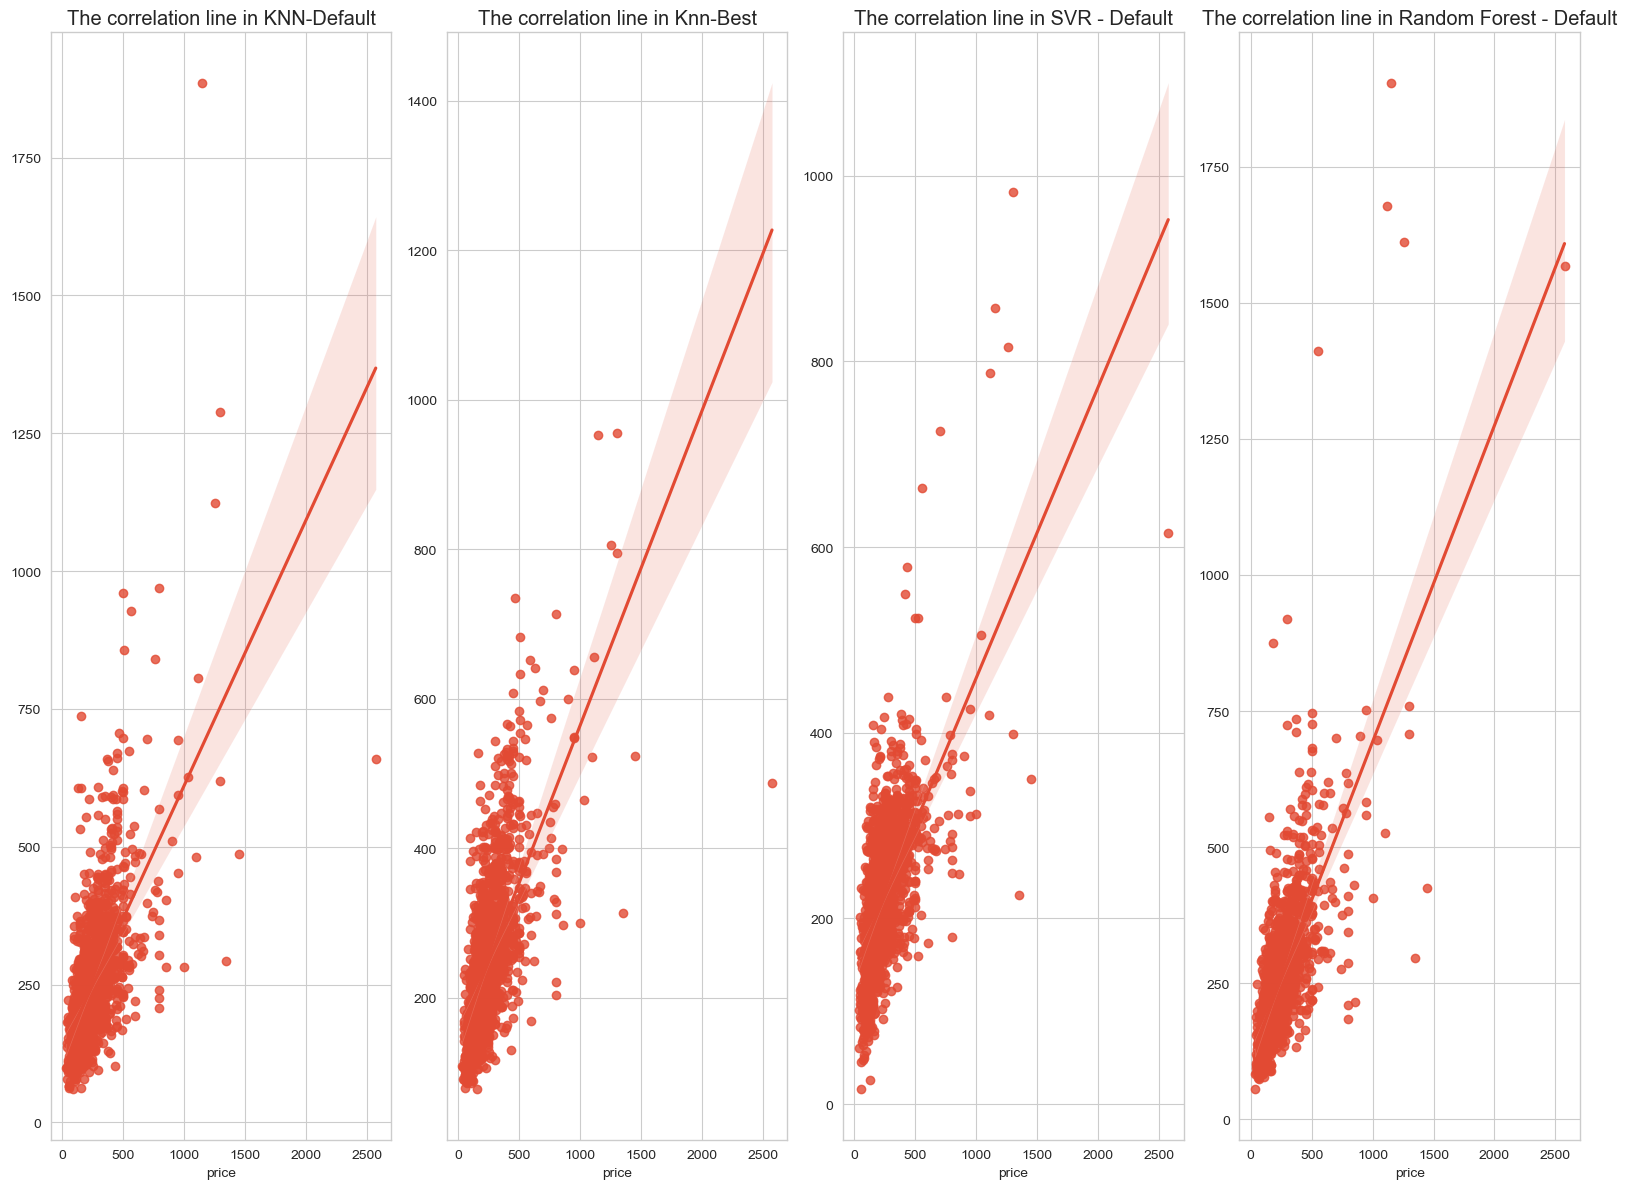

In [128]:
prediction_dictionaries['Random Forest - Default'] = forest_model_prediction
plot_all_r2()

In [129]:
prediction_list['Random Forest - Default'] = np.array(preds_svr[:20])
prediction_list

KNN-Default    KNN-Best  SVR-Default  Random Forest - Default
Actual Values                                                               
175.0                224.8  259.200000   276.889326               276.889326
550.0                284.6  346.600000   286.447631               286.447631
294.0                336.2  375.333333   260.436080               260.436080
89.0                 189.8  171.466667   189.729036               189.729036
163.0                216.8  231.600000   210.925055               210.925055
226.0                276.0  248.800000   216.128929               216.128929
155.0                128.8  140.066667   172.172835               172.172835
85.0                 119.6  111.800000   103.563839               103.563839
430.0                383.8  513.266667   312.640667               312.640667
350.0                190.8  187.666667   126.569024               126.569024
305.0                342.0  421.466667   283.425159               283.425159
449.0                549.6  433.200000   313.755513               313.755513
391.0                481.8  399.066667   313.872833               313.872833
160.0                232.0  255.133333   147.650562               147.650562
250.0                224.6  223.266667   226.951633               226.951633
209.0                242.8  235.200000   125.775958               125.775958
118.0                119.2  118.000000    94.077481                94.077481
310.0                364.0  301.466667   263.902142               263.902142
222.0                187.6  199.533333   183.506623               183.506623
56.0                  65.6  102.866667   106.457654               106.457654

In [130]:
error_list['Random Forest - Default'] = [forest_mse, forest_r2]
error_list.T

Mean Squared Error  R2 Score
KNN Default                    16019.499463  0.381235
MSE KNN-Best                   14547.483758  0.438093
SVR Default                    16537.364326  0.361232
SVR Best                       16543.106815  0.361010
Random Forest - Default        13357.157403  0.484070

Among these models, the Random Forest with default hyperparameters has the lowest MSE and the highest R2 score, indicating that it performs the best according to these metrics.

### LINEAR REGRESSION

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


linear_model = LinearRegression().fit(X_train, y_train)
linear_model_prediction = linear_model.predict(X_test)

linear_mse = metrics.mean_squared_error(y_test, linear_model_prediction)
linear_mae = metrics.mean_absolute_error(y_test, linear_model_prediction)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = metrics.r2_score(y_test, linear_model_prediction)

print("Mean Squared Error: {}".format(linear_mse))
print("Mean Absolute Error: {}".format(linear_mae))
print("Root Mean Absolute Error: {}".format(linear_rmse))
print("R2 score: {}".format(linear_r2))

Mean Squared Error: 15176.890540565755
Mean Absolute Error: 79.16490812689918
Root Mean Absolute Error: 123.19452317601524
R2 score: 0.41378128804635417


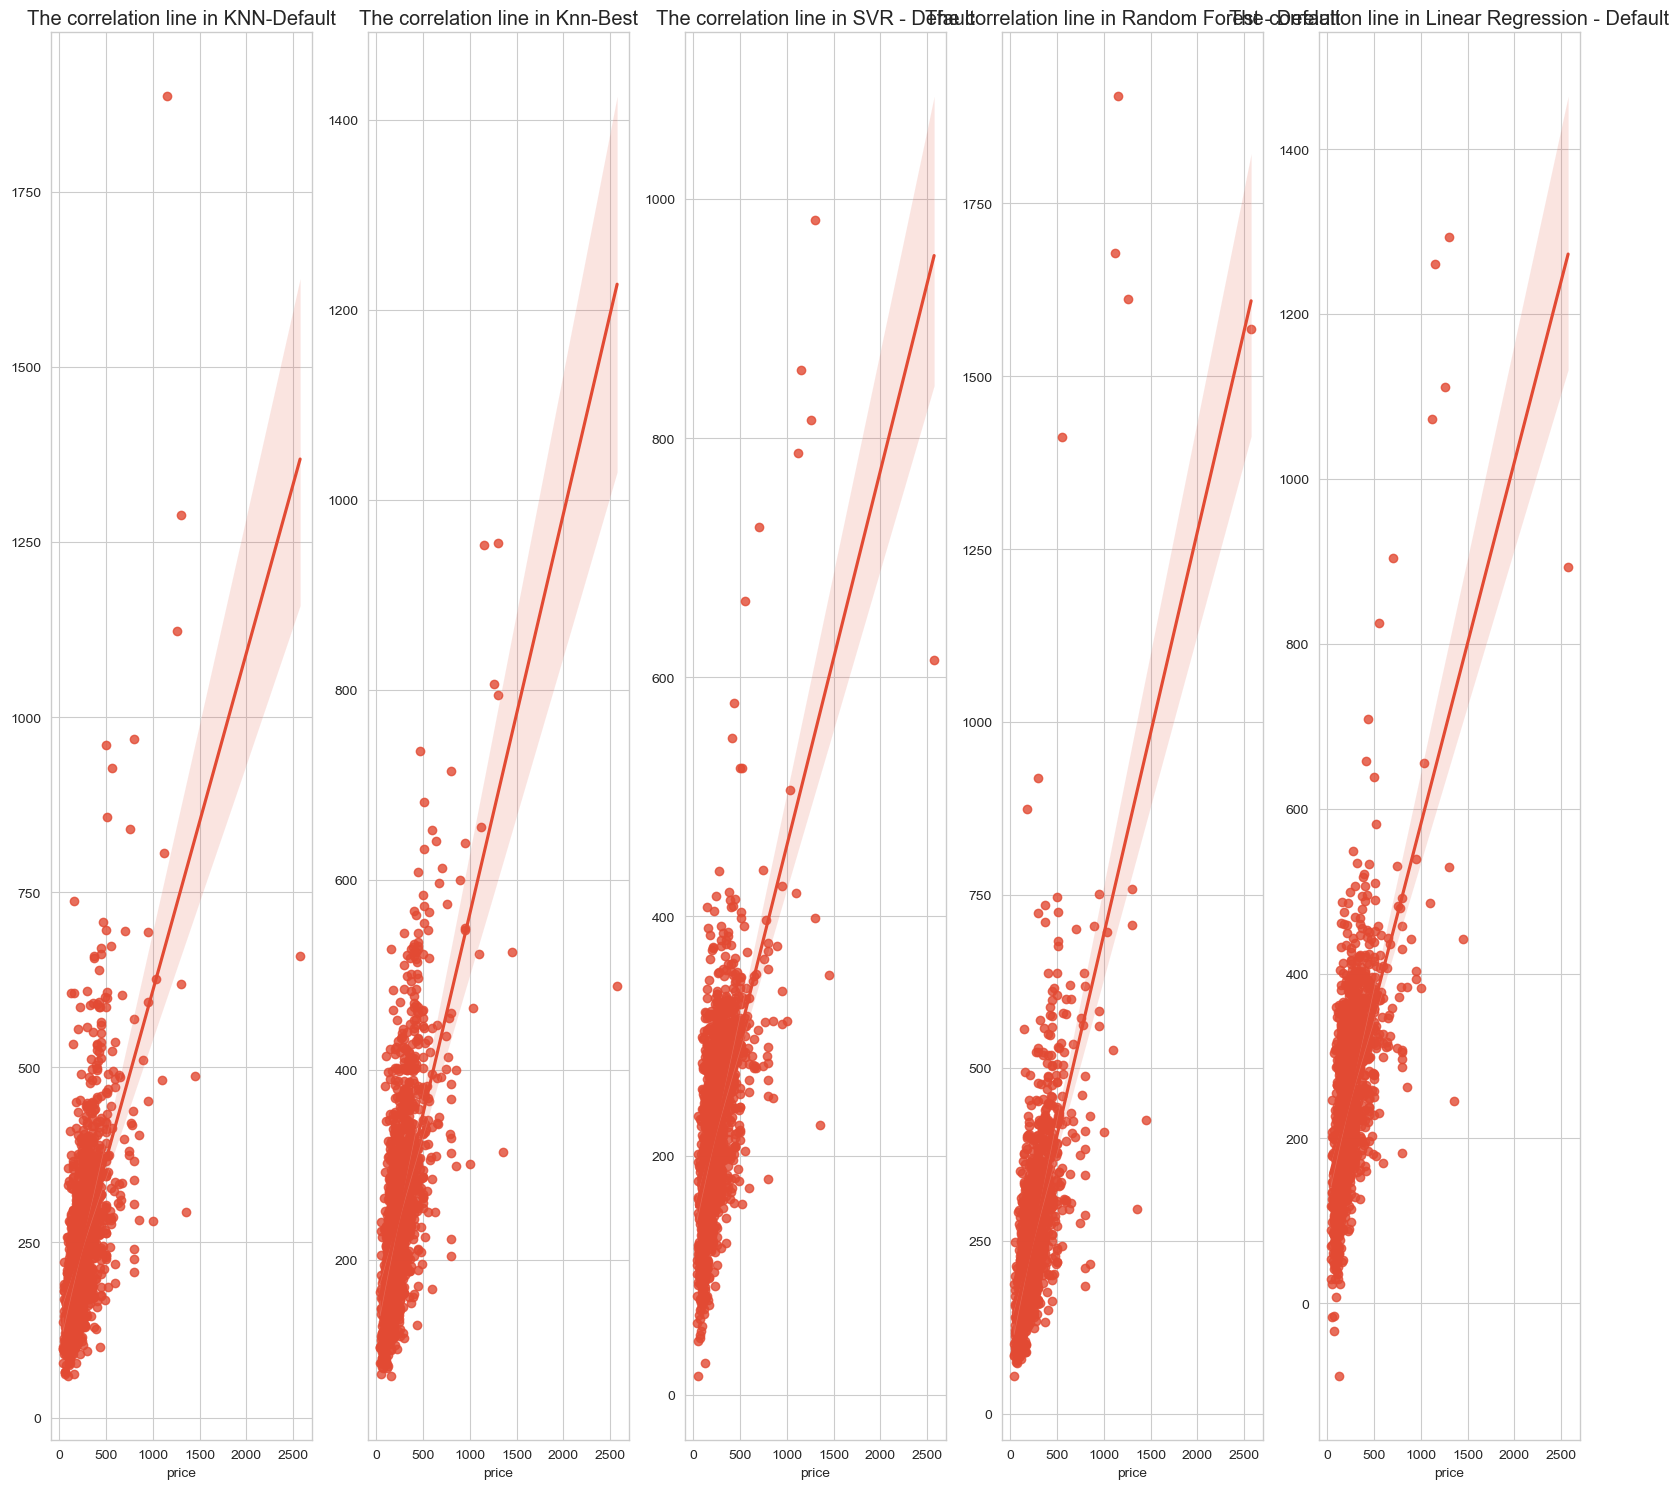

In [132]:
prediction_dictionaries['Linear Regression - Default'] = linear_model_prediction
plot_all_r2()

In [133]:
prediction_list['Linear Regression - Default'] = np.array(preds_svr[:20])
prediction_list


KNN-Default    KNN-Best  SVR-Default  Random Forest - Default  \
Actual Values                                                                  
175.0                224.8  259.200000   276.889326               276.889326   
550.0                284.6  346.600000   286.447631               286.447631   
294.0                336.2  375.333333   260.436080               260.436080   
89.0                 189.8  171.466667   189.729036               189.729036   
163.0                216.8  231.600000   210.925055               210.925055   
226.0                276.0  248.800000   216.128929               216.128929   
155.0                128.8  140.066667   172.172835               172.172835   
85.0                 119.6  111.800000   103.563839               103.563839   
430.0                383.8  513.266667   312.640667               312.640667   
350.0                190.8  187.666667   126.569024               126.569024   
305.0                342.0  421.466667   283.425159               283.425159   
449.0                549.6  433.200000   313.755513               313.755513   
391.0                481.8  399.066667   313.872833               313.872833   
160.0                232.0  255.133333   147.650562               147.650562   
250.0                224.6  223.266667   226.951633               226.951633   
209.0                242.8  235.200000   125.775958               125.775958   
118.0                119.2  118.000000    94.077481                94.077481   
310.0                364.0  301.466667   263.902142               263.902142   
222.0                187.6  199.533333   183.506623               183.506623   
56.0                  65.6  102.866667   106.457654               106.457654   

               Linear Regression - Default  
Actual Values                               
175.0                           276.889326  
550.0                           286.447631  
294.0                           260.436080  
89.0                            189.729036  
163.0                           210.925055  
226.0                           216.128929  
155.0                           172.172835  
85.0                            103.563839  
430.0                           312.640667  
350.0                           126.569024  
305.0                           283.425159  
449.0                           313.755513  
391.0                           313.872833  
160.0                           147.650562  
250.0                           226.951633  
209.0                           125.775958  
118.0                            94.077481  
310.0                           263.902142  
222.0                           183.506623  
56.0                            106.457654

In [134]:
error_list['Linear Regression - Default'] = [linear_mse, linear_r2]
error_list.T

Mean Squared Error  R2 Score
KNN Default                        16019.499463  0.381235
MSE KNN-Best                       14547.483758  0.438093
SVR Default                        16537.364326  0.361232
SVR Best                           16543.106815  0.361010
Random Forest - Default            13357.157403  0.484070
Linear Regression - Default        15176.890541  0.413781

Based on these results, the Random Forest model (with default hyperparameters) has the lowest Mean Squared Error and the highest R-squared score, indicating it performs the best among the models we’ ve tested.

We will use Ridge in order to apply Hyperparameter tuning.

In [136]:
from sklearn.linear_model import Ridge

alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 250, 500, 750, 1000, 1500, 2500, 5000, 10000, 100000, 1000000]
param_grid = {
    'alpha': alpha
}

ridge = Ridge(alpha=1).fit(X_train, y_train)
scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
scores_mse = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("CV Mean for Ridge (r2): ", np.mean(scores))
print("CV Mean for Ridge (mse): ", np.mean(scores_mse) * -1)

CV Mean for Ridge (r2):  0.3594579185467218
CV Mean for Ridge (mse):  18252.353388720083


In [137]:
grid_mse = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_result_mse = grid_mse.fit(X_train, y_train)

grid_r2 = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result_r2 = grid_r2.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


we 've performed a grid search for the best alpha value for Ridge regression using both Mean Squared Error (mse) and R-squared (r2) as evaluation metrics. 

In [138]:
print('Best Score for mse: ', grid_mse.best_score_ * -1)
print('Best Params for mse: ', grid_mse.best_params_)
print()
print('Best Score for r2: ', grid_r2.best_score_)
print('Best Params for r2: ', grid_r2.best_params_)

Best Score for mse:  18250.85287333776
Best Params for mse:  {'alpha': 10}

Best Score for r2:  0.3595259348712523
Best Params for r2:  {'alpha': 10}


In [139]:
ridge_best = Ridge(alpha=500).fit(X_train, y_train)
ridge_best.fit(X_train, y_train)
ridge_pred = ridge_best.predict(X_test)

ridge_mse_best = metrics.mean_squared_error(y_test, ridge_pred)
ridge_mae_best = metrics.mean_absolute_error(y_test, ridge_pred)
ridge_rmse_best = np.sqrt(ridge_mse_best)
ridge_r2_best = metrics.r2_score(y_test, ridge_pred)

print("Mean Squared Error: {}".format(ridge_mse_best))
print("Mean Absolute Error: {}".format(ridge_mae_best))
print("Root Mean Absolute Error: {}".format(ridge_rmse_best))
print("R2 score: {}".format(ridge_r2_best))

Mean Squared Error: 15440.901222692753
Mean Absolute Error: 79.63983719382324
Root Mean Absolute Error: 124.26142290627753
R2 score: 0.4035836786213657


After using Grid Search CV, we found that alpha=10 is the best parameter for Ridge. This indicates that the Ridge regression model performs best with an alpha value of 10, according to both evaluation metrics.


In [146]:
dict_val = {'Linear Model': [linear_r2, linear_mse],'Ridge': [ridge_r2_best, ridge_mse_best]}
res_df_linear_ridge = pd.DataFrame(dict_val, index=['R2', 'MSE'])
res_df_linear_ridge

Linear Model         Ridge
R2       0.413781      0.403584
MSE  15176.890541  15440.901223

In [141]:
prediction_dictionaries['Ridge'] = ridge_pred

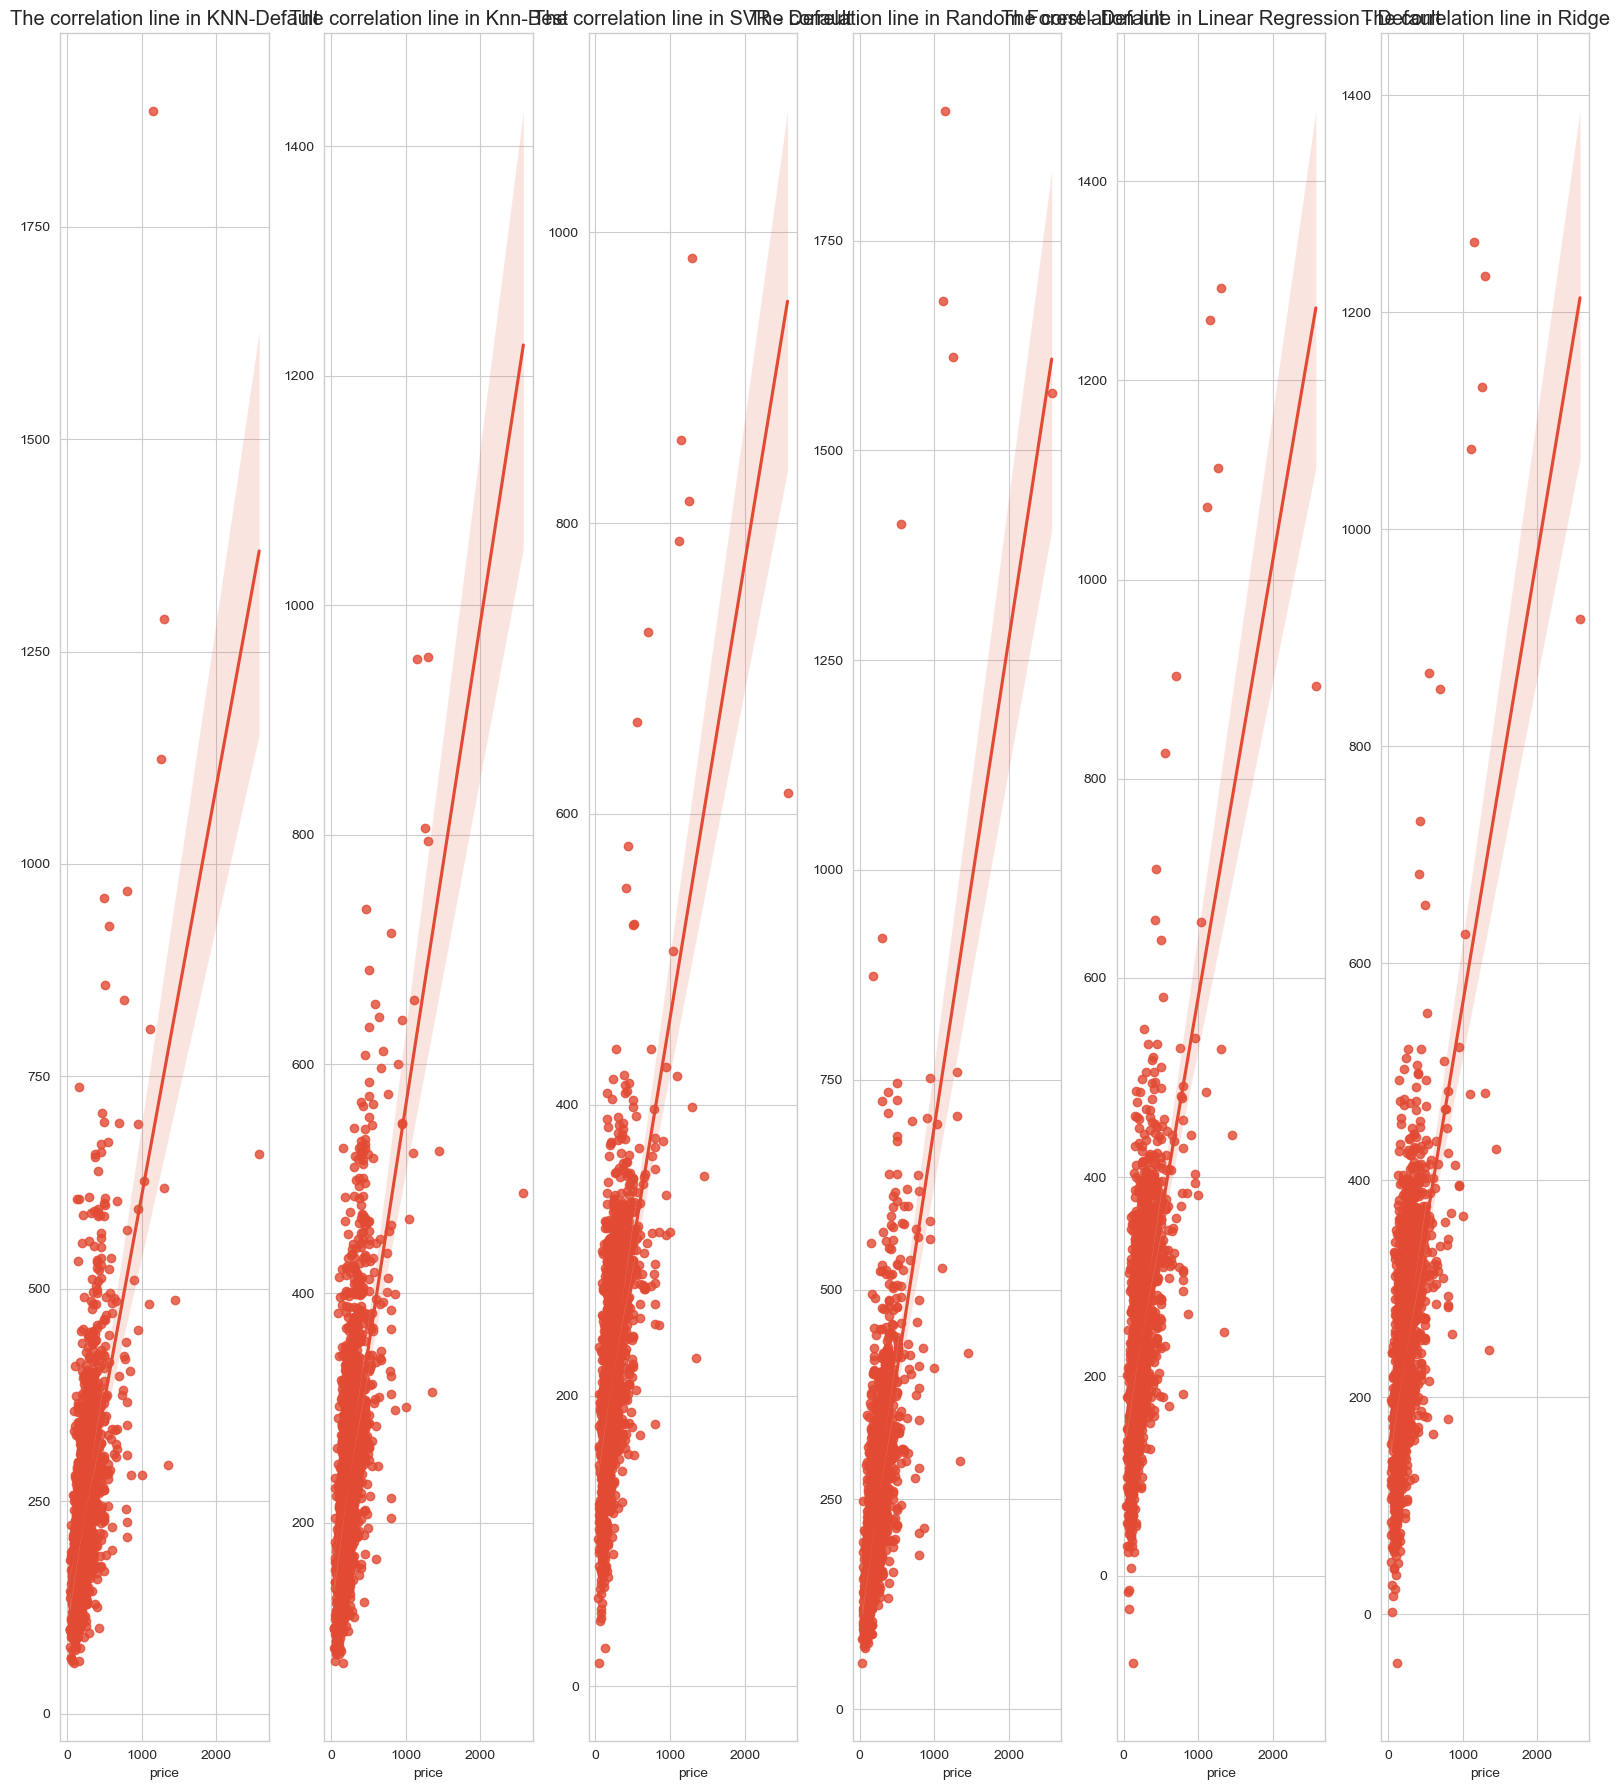

In [142]:
plot_all_r2()

In [143]:
prediction_list['Ridge'] = np.array(preds_svr[:20])
prediction_list

KNN-Default    KNN-Best  SVR-Default  Random Forest - Default  \
Actual Values                                                                  
175.0                224.8  259.200000   276.889326               276.889326   
550.0                284.6  346.600000   286.447631               286.447631   
294.0                336.2  375.333333   260.436080               260.436080   
89.0                 189.8  171.466667   189.729036               189.729036   
163.0                216.8  231.600000   210.925055               210.925055   
226.0                276.0  248.800000   216.128929               216.128929   
155.0                128.8  140.066667   172.172835               172.172835   
85.0                 119.6  111.800000   103.563839               103.563839   
430.0                383.8  513.266667   312.640667               312.640667   
350.0                190.8  187.666667   126.569024               126.569024   
305.0                342.0  421.466667   283.425159               283.425159   
449.0                549.6  433.200000   313.755513               313.755513   
391.0                481.8  399.066667   313.872833               313.872833   
160.0                232.0  255.133333   147.650562               147.650562   
250.0                224.6  223.266667   226.951633               226.951633   
209.0                242.8  235.200000   125.775958               125.775958   
118.0                119.2  118.000000    94.077481                94.077481   
310.0                364.0  301.466667   263.902142               263.902142   
222.0                187.6  199.533333   183.506623               183.506623   
56.0                  65.6  102.866667   106.457654               106.457654   

               Linear Regression - Default       Ridge  
Actual Values                                           
175.0                           276.889326  276.889326  
550.0                           286.447631  286.447631  
294.0                           260.436080  260.436080  
89.0                            189.729036  189.729036  
163.0                           210.925055  210.925055  
226.0                           216.128929  216.128929  
155.0                           172.172835  172.172835  
85.0                            103.563839  103.563839  
430.0                           312.640667  312.640667  
350.0                           126.569024  126.569024  
305.0                           283.425159  283.425159  
449.0                           313.755513  313.755513  
391.0                           313.872833  313.872833  
160.0                           147.650562  147.650562  
250.0                           226.951633  226.951633  
209.0                           125.775958  125.775958  
118.0                            94.077481   94.077481  
310.0                           263.902142  263.902142  
222.0                           183.506623  183.506623  
56.0                            106.457654  106.457654

In [145]:
error_list['Ridge'] = [ridge_mse_best, ridge_r2_best]
error_list.T

Mean Squared Error  R2 Score
KNN Default                        16019.499463  0.381235
MSE KNN-Best                       14547.483758  0.438093
SVR Default                        16537.364326  0.361232
SVR Best                           16543.106815  0.361010
Random Forest - Default            13357.157403  0.484070
Linear Regression - Default        15176.890541  0.413781
Ridge                              15440.901223  0.403584

So, Random Forest model gives us the best score in R2 as well as MSE. 